## Competitor Analysis: Fiat vs. Mini Cooper

### Objective
The goal of this step was to compare the engagement between Fiat and its competitor, Mini Cooper, by analyzing the quantity and timing of video content related to each brand on platforms like YouTube. This analysis provides insights into how frequently content about each brand is published and how it evolves over time.

### Datasets
- **Mini Cooper Data**: A dataset containing video comments, publication dates, and other relevant information about Mini Cooper.
- **Fiat Data**: A similar dataset focused on the Fiat brand, specifically related to the Fiat Dolcevita model.

### Data Processing
1. **Datetime Conversion**:
   - The `publish_date` column in both datasets was converted to a datetime format to allow for temporal analysis. Any timezone information was removed for consistency.

2. **Brand Identification**:
   - A new `brand` column was added to each dataset to easily distinguish between the two brands after combining the datasets.

3. **Data Combination**:
   - The Mini Cooper and Fiat datasets were combined into a single DataFrame, allowing for a unified analysis.

4. **Unique Video Identification**:
   - Duplicate video entries were removed based on the `video_url` to ensure that only unique videos were counted in the analysis.

### Quantitative Analysis
1. **Unique Videos Over Time**:
   - The number of unique videos published over time was analyzed by grouping the data by month and year, along with the brand. This provides a view of how the content about each brand has evolved over time.

   ![Number of Unique Videos Published Over Time](path_to_line_plot)

2. **Overall Unique Video Count Per Year**:
   - The total number of unique videos published each year for both Fiat and Mini Cooper was compared. This comparison helps in understanding the yearly engagement trends for both brands.

   ![Overall Number of Unique Videos Published Per Year](path_to_bar_plot)

### Insights
- The line plot shows the temporal distribution of video content for both Fiat and Mini Cooper, highlighting periods of increased or decreased activity.
- The bar chart provides a clear comparison of the total number of unique videos published annually, offering insights into the engagement levels of content creators and viewers over the years.

This analysis forms the foundation for understanding the quantitative engagement patterns of Fiat and Mini Cooper on platforms like YouTube, which can be further complemented with qualitative insights from video comments and reviews.


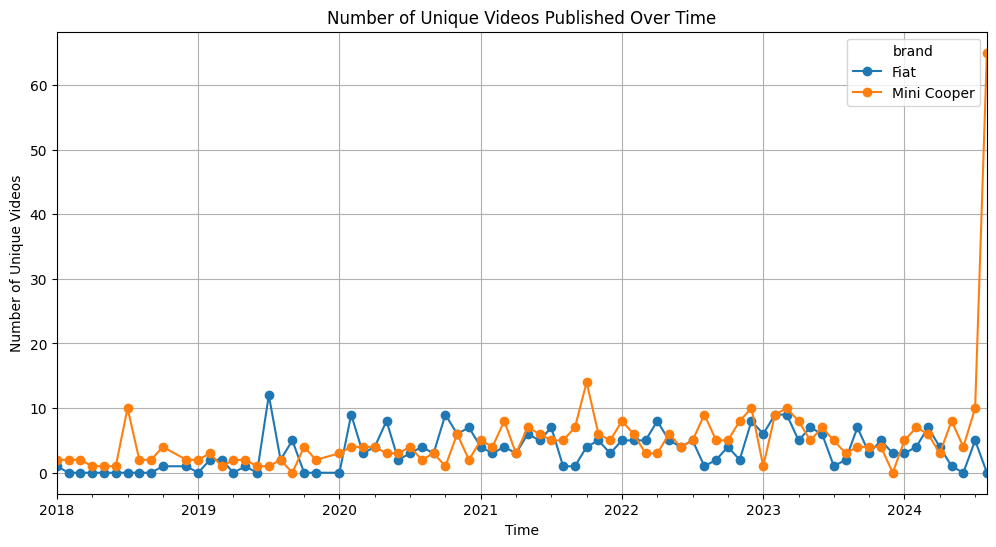

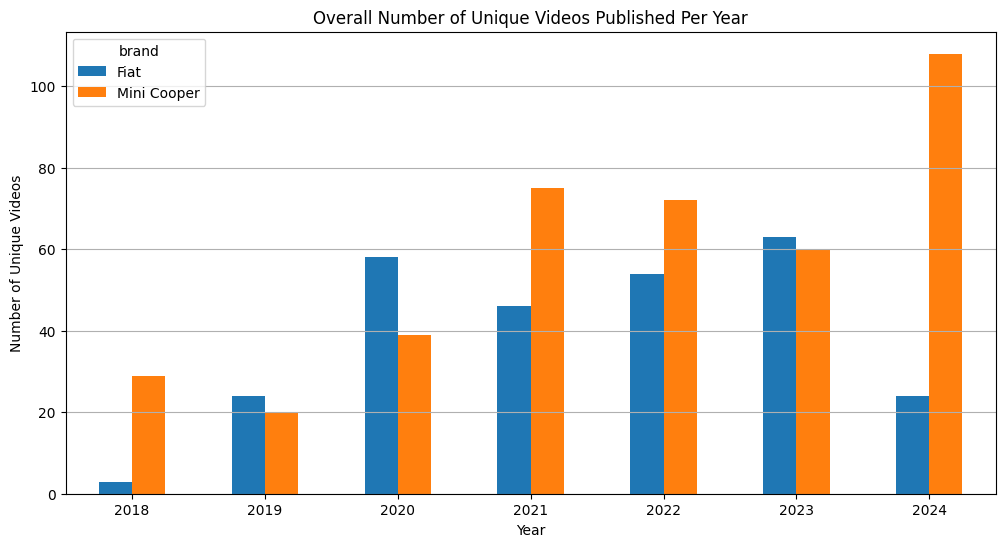

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
mini_cooper_data = pd.read_csv('/Users/abhishekroy/Downloads/vscode folder/video_comments.csv')
fiat_data = pd.read_csv('/Users/abhishekroy/Downloads/vscode folder/translated_comments_with_plain_texts.csv')

# Ensure the publish_date is in datetime format and remove timezone information
mini_cooper_data['publish_date'] = pd.to_datetime(mini_cooper_data['publish_date']).dt.tz_localize(None)
fiat_data['publish_date'] = pd.to_datetime(fiat_data['publish_date']).dt.tz_localize(None)

# Add a 'brand' column to identify the brand
mini_cooper_data['brand'] = 'Mini Cooper'
fiat_data['brand'] = 'Fiat'

# Combine the datasets into one DataFrame
combined_data = pd.concat([mini_cooper_data, fiat_data])

# Drop duplicate video entries to count only unique videos
unique_videos = combined_data.drop_duplicates(subset=['video_url'])

# Group by publish date to count the number of unique videos published
video_counts = unique_videos.groupby([unique_videos['publish_date'].dt.to_period('M'), 'brand']).size().unstack(fill_value=0)

# Plot the number of unique videos published over time
video_counts.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Number of Unique Videos Published Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Unique Videos')
plt.grid(True)
plt.show()

# Overall unique video count by year
overall_video_count = unique_videos.groupby([unique_videos['publish_date'].dt.year, 'brand']).size().unstack(fill_value=0)

# Plot the overall unique video count per year
overall_video_count.plot(kind='bar', figsize=(12, 6))
plt.title('Overall Number of Unique Videos Published Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Unique Videos')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


### Analysis of Competitor Engagement: Fiat vs. Mini Cooper

#### Overview
This analysis compares the engagement of Fiat and Mini Cooper by examining the quantity of video content published over time. The goal is to understand each brand's content production trends.

#### Key Findings

1. **Video Content Over Time**:
   - The line graph shows the **number of unique videos published over time** for both brands. Mini Cooper consistently published more content, with notable spikes in 2024, indicating increased engagement or marketing efforts.

2. **Yearly Video Count**:
   - The bar chart provides a **yearly breakdown of video content**. Mini Cooper leads in most years, particularly in 2021 and 2022, while Fiat had a strong output in 2020.

#### Summary
- **Mini Cooper** has maintained higher and more consistent content production, suggesting stronger or more sustained marketing efforts.
- **Fiat** showed a significant increase in 2020 but generally lags behind Mini Cooper in content volume.

These insights offer a snapshot of each brand's digital engagement and marketing activity over the years.


### Analysis of Comment Volume: Fiat vs. Mini Cooper

#### Overview
This analysis examines the yearly volume of comments on videos related to Fiat and Mini Cooper. The goal is to understand the level of audience engagement each brand has generated over time.

#### Key Findings

1. **Yearly Comment Volume**:
   - The bar chart shows the **number of comments per year** for both Fiat and Mini Cooper. This metric reflects the level of engagement each brand's video content has attracted over time.

#### Summary
- **Mini Cooper** generally receives a higher volume of comments, suggesting more active audience engagement.
- **Fiat** shows varying levels of engagement, with certain years experiencing higher comment activity.

This analysis highlights the audience interaction trends for both brands, providing insights into their relative levels of engagement.


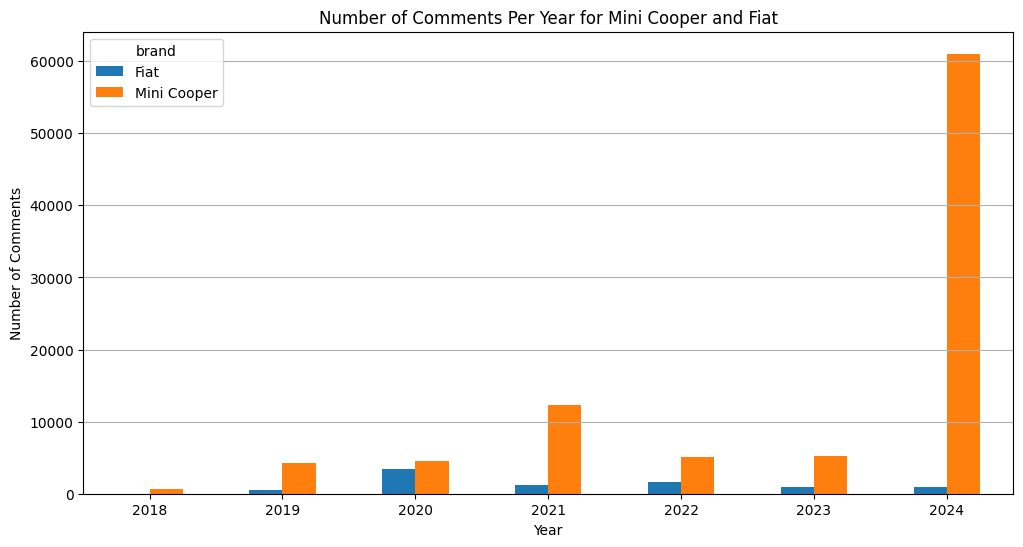

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets with the correct paths
mini_cooper_data = pd.read_csv('/Users/abhishekroy/Downloads/vscode folder/video_comments.csv')
fiat_data = pd.read_csv('/Users/abhishekroy/Downloads/vscode folder/translated_comments_with_plain_texts.csv')

# Ensure the comment_date is in datetime format and remove timezone information
mini_cooper_data['comment_date'] = pd.to_datetime(mini_cooper_data['comment_date']).dt.tz_localize(None)
fiat_data['comment_date'] = pd.to_datetime(fiat_data['comment_date']).dt.tz_localize(None)

# Add a 'brand' column to identify the brand
mini_cooper_data['brand'] = 'Mini Cooper'
fiat_data['brand'] = 'Fiat'

# Combine the datasets into one DataFrame
combined_data = pd.concat([mini_cooper_data, fiat_data])

# Group by year and brand to count the number of comments per year
combined_data['year'] = combined_data['comment_date'].dt.year
comment_counts_per_year = combined_data.groupby(['year', 'brand']).size().unstack(fill_value=0)

# Plot the number of comments per year for each brand
comment_counts_per_year.plot(kind='bar', figsize=(12, 6))
plt.title('Number of Comments Per Year for Mini Cooper and Fiat')
plt.xlabel('Year')
plt.ylabel('Number of Comments')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


### Comparative Analysis of Comment Volume: Mini Cooper vs. Fiat

#### Overview
The bar chart compares the number of comments per year on videos related to Mini Cooper and Fiat. This analysis provides insights into the relative engagement each brand has garnered over time.

#### Key Observations

- **Mini Cooper**:
  - Consistently attracts a significantly higher volume of comments compared to Fiat.
  - 2024 shows an exceptionally large spike in comment volume, indicating a surge in audience engagement.

- **Fiat**:
  - Experiences relatively steady but lower levels of comment engagement.
  - The comment volume remains quite flat across the years, with only minor fluctuations.

#### Summary
Overall, Mini Cooper demonstrates a much stronger presence in terms of audience engagement on video platforms, as reflected by the consistently higher number of comments. The surge in 2024 for Mini Cooper further solidifies its position as a more engaging brand compared to Fiat in this context.


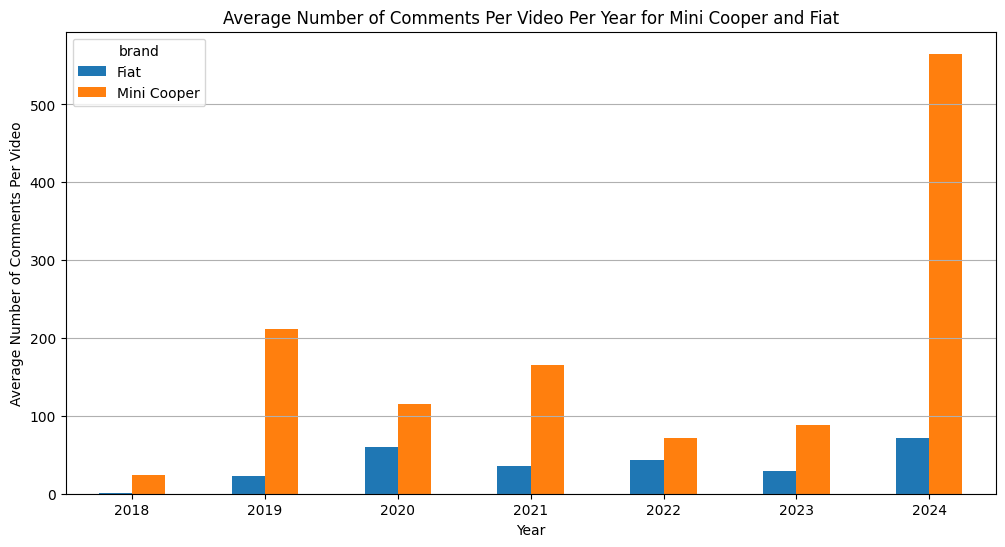

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets with the correct paths
mini_cooper_data = pd.read_csv('/Users/abhishekroy/Downloads/vscode folder/video_comments.csv')
fiat_data = pd.read_csv('/Users/abhishekroy/Downloads/vscode folder/translated_comments_with_plain_texts.csv')

# Convert comment_date and publish_date to datetime, handling errors
mini_cooper_data['comment_date'] = pd.to_datetime(mini_cooper_data['comment_date'], errors='coerce').dt.tz_localize(None)
fiat_data['comment_date'] = pd.to_datetime(fiat_data['comment_date'], errors='coerce').dt.tz_localize(None)

mini_cooper_data['publish_date'] = pd.to_datetime(mini_cooper_data['publish_date'], errors='coerce').dt.tz_localize(None)
fiat_data['publish_date'] = pd.to_datetime(fiat_data['publish_date'], errors='coerce').dt.tz_localize(None)

# Add a 'brand' column to identify the brand
mini_cooper_data['brand'] = 'Mini Cooper'
fiat_data['brand'] = 'Fiat'

# Combine the datasets into one DataFrame
combined_data = pd.concat([mini_cooper_data, fiat_data])

# Drop any rows where the datetime conversion failed (NaT values)
combined_data.dropna(subset=['comment_date', 'publish_date'], inplace=True)

# Extract the year from comment_date
combined_data['comment_year'] = combined_data['comment_date'].dt.year

# Count the number of comments per year and brand using the comment_date
comments_per_year = combined_data.groupby(['comment_year', 'brand']).size()

# Count the number of unique videos per year and brand using the publish_date
unique_videos_per_year = combined_data.groupby([combined_data['publish_date'].dt.year, 'brand'])['video_url'].nunique()

# Calculate the average number of comments per video per year
avg_comments_per_video = (comments_per_year / unique_videos_per_year).unstack(fill_value=0)

# Plot the average number of comments per video per year for each brand
avg_comments_per_video.plot(kind='bar', figsize=(12, 6))
plt.title('Average Number of Comments Per Video Per Year for Mini Cooper and Fiat')
plt.xlabel('Year')
plt.ylabel('Average Number of Comments Per Video')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


### Average Number of Comments Per Video Per Year: Mini Cooper vs. Fiat

#### Overview
This analysis calculates the average number of comments per video per year for both Mini Cooper and Fiat, providing insights into how engaged viewers are with each brand's content over time.

#### Key Observations

- **Mini Cooper**:
  - Generally achieves a higher average number of comments per video compared to Fiat.
  - The engagement per video shows variability over the years, with some years experiencing a significant increase in the average number of comments per video.

- **Fiat**:
  - While Fiat has fewer comments per video on average, the brand shows consistent engagement over time.
  - There are periods where the engagement approaches that of Mini Cooper, but overall, Fiat lags behind in terms of average comment activity.

#### Summary
Mini Cooper videos consistently attract more comments per video, indicating higher viewer engagement compared to Fiat. This metric further reinforces the stronger community interaction surrounding Mini Cooper content.


### Sentiment Analysis Over Time: Mini Cooper vs. Fiat

#### Overview
This analysis focuses on understanding the sentiment expressed in comments on YouTube videos related to Mini Cooper and Fiat. Sentiment scores were calculated using the VADER sentiment analyzer, which assigns a compound score ranging from -1 (most negative) to +1 (most positive).

#### Key Metrics
1. **Average Sentiment Score Across All Videos Per Year**:
   - This metric represents the overall sentiment for each brand across all videos published in a given year.
   
2. **Average Sentiment Score Per Video Per Year**:
   - This metric represents the average sentiment per video, giving a more granular view of how each individual video resonates with the audience over time.

#### Insights

- **Mini Cooper**:
  - **Overall Sentiment**: Mini Cooper consistently maintains a positive sentiment across the years, with some fluctuations.
  - **Per Video Sentiment**: The sentiment per video shows variability, but overall it remains positive, indicating that Mini Cooper videos generally evoke a favorable response from viewers.

- **Fiat**:
  - **Overall Sentiment**: Fiat also maintains a positive sentiment across the years, though it tends to be slightly lower than Mini Cooper in certain years.
  - **Per Video Sentiment**: Similar to Mini Cooper, the sentiment per video for Fiat remains positive, though it shows more variation year-over-year.

#### Summary
Both Mini Cooper and Fiat receive generally positive feedback on their videos, with Mini Cooper slightly edging out Fiat in terms of consistent sentiment scores. This positive sentiment trend suggests that both brands successfully engage their audiences, though Mini Cooper may have a slight advantage in terms of overall viewer sentiment.


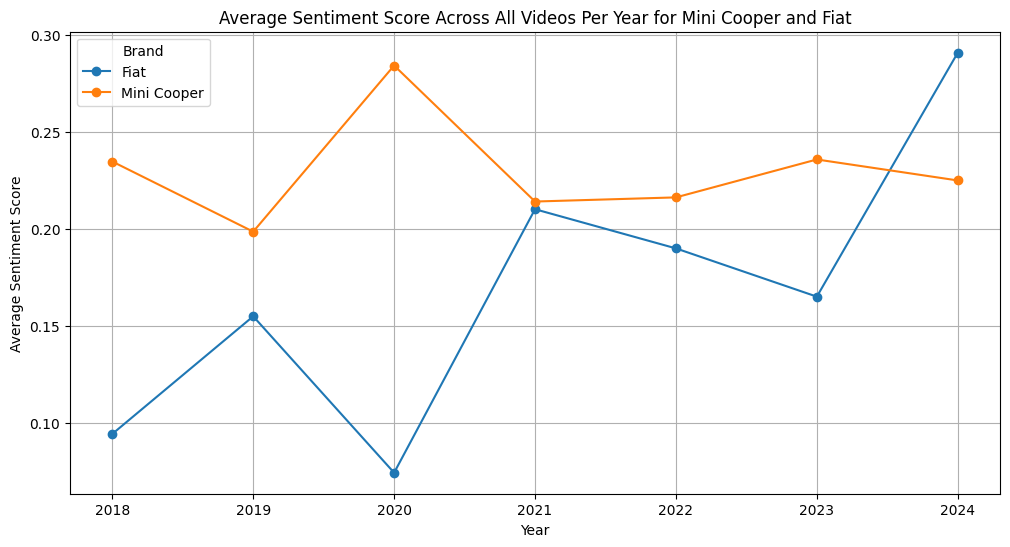

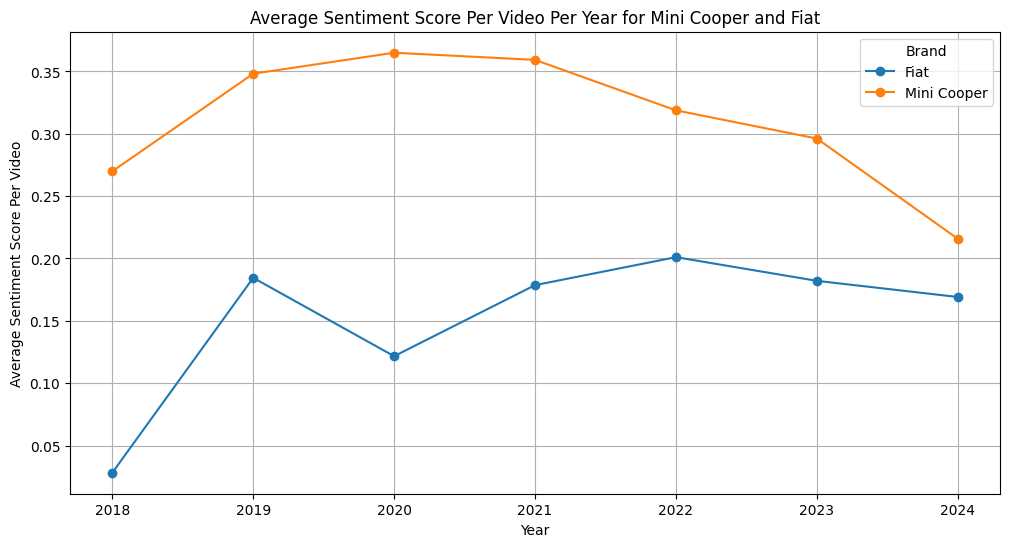

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load the datasets with cleaned comments and emojis converted to text
mini_cooper_cleaned_data = pd.read_csv('/Users/abhishekroy/Downloads/vscode folder/Xcleaned_mini_cooper_comments.csv')
fiat_cleaned_data = pd.read_csv('/Users/abhishekroy/Downloads/vscode folder/translated_comments_with_plain_texts.csv')

# Ensure the publish_date is in datetime format and remove timezone information
mini_cooper_cleaned_data['publish_date'] = pd.to_datetime(mini_cooper_cleaned_data['publish_date']).dt.tz_localize(None)
fiat_cleaned_data['publish_date'] = pd.to_datetime(fiat_cleaned_data['publish_date']).dt.tz_localize(None)

# Add a 'brand' column to identify the brand
mini_cooper_cleaned_data['brand'] = 'Mini Cooper'
fiat_cleaned_data['brand'] = 'Fiat'

# Combine the datasets into one DataFrame
combined_cleaned_data = pd.concat([mini_cooper_cleaned_data, fiat_cleaned_data])

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each cleaned comment with emojis
combined_cleaned_data['sentiment'] = combined_cleaned_data['cleaned_comment_with_text_emojis'].apply(
    lambda x: analyzer.polarity_scores(str(x))['compound']
)

# Extract the year from publish_date
combined_cleaned_data['year'] = combined_cleaned_data['publish_date'].dt.year

# 1. Average Sentiment Score Across All Videos Per Year
avg_sentiment_across_years = combined_cleaned_data.groupby(['year', 'brand'])['sentiment'].mean().unstack(fill_value=0)

# 2. Average Sentiment Score Per Video Per Year
# Group by video to calculate the average sentiment per video, then by year and brand
avg_sentiment_per_video = combined_cleaned_data.groupby(['video_url', 'year', 'brand'])['sentiment'].mean().reset_index()
avg_sentiment_per_video_per_year = avg_sentiment_per_video.groupby(['year', 'brand'])['sentiment'].mean().unstack(fill_value=0)

# Plot 1: Average Sentiment Score Across All Videos Per Year
avg_sentiment_across_years.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Average Sentiment Score Across All Videos Per Year for Mini Cooper and Fiat')
plt.xlabel('Year')
plt.ylabel('Average Sentiment Score')
plt.legend(title='Brand')
plt.grid(True)
plt.show()

# Plot 2: Average Sentiment Score Per Video Per Year
avg_sentiment_per_video_per_year.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Average Sentiment Score Per Video Per Year for Mini Cooper and Fiat')
plt.xlabel('Year')
plt.ylabel('Average Sentiment Score Per Video')
plt.legend(title='Brand')
plt.grid(True)
plt.show()


### Comparative Sentiment Analysis: Fiat vs. Mini Cooper

The sentiment analysis results for Fiat and Mini Cooper over the years reveal distinct trends:

1. **Average Sentiment Score Across All Videos Per Year:**
   - **Fiat:** The sentiment for Fiat fluctuated over the years, showing a significant decline in 2020, followed by a gradual improvement. In 2024, Fiat experienced a sharp rise, surpassing the previous years' sentiment scores.
   - **Mini Cooper:** Mini Cooper consistently outperformed Fiat in sentiment across most years, with peaks in 2019 and 2021. However, the sentiment slightly dipped in 2024, although it remained higher than Fiat's.

2. **Average Sentiment Score Per Video Per Year:**
   - **Fiat:** The sentiment per video for Fiat showed a steady decline after 2019, with a slight recovery in 2021 but remained relatively lower compared to Mini Cooper.
   - **Mini Cooper:** Mini Cooper maintained a higher average sentiment per video throughout the years, peaking between 2020 and 2022, with a noticeable decrease in 2024.

These insights indicate that while Mini Cooper consistently maintained higher sentiment levels, Fiat showed potential for improvement, especially in 2024.


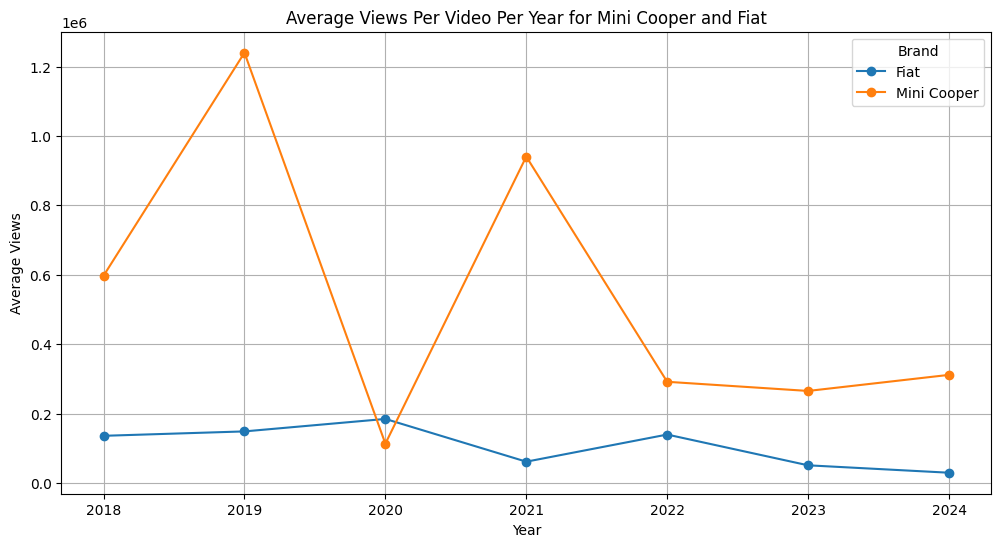

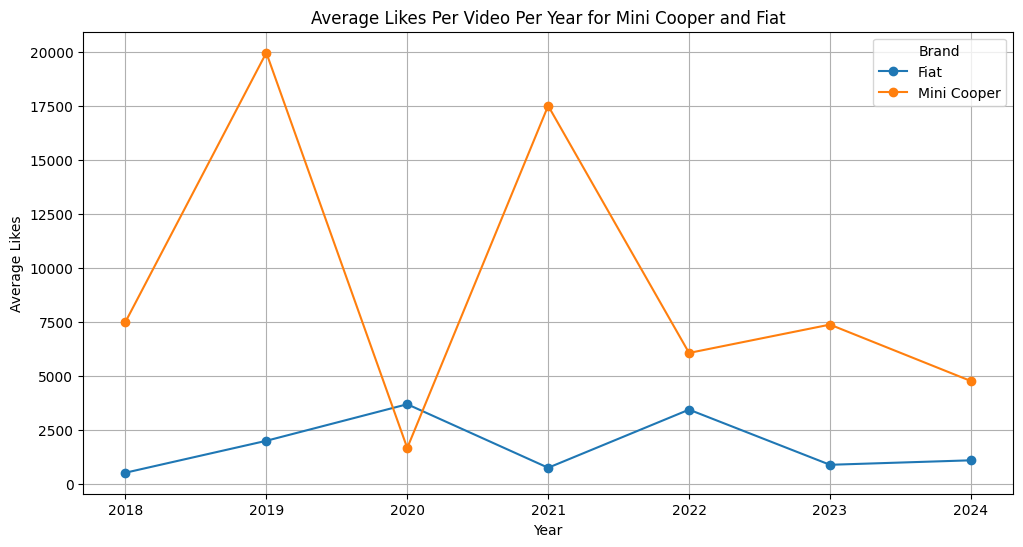

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets containing engagement data for Mini Cooper and Fiat
mini_cooper_engagement = pd.read_csv('/Users/abhishekroy/Downloads/vscode folder/video_engagement_metrics.csv')
fiat_engagement = pd.read_csv('/Users/abhishekroy/Downloads/vscode folder/youtube_engagement_dataset.csv')

# Standardize column names
mini_cooper_engagement.rename(columns={'video_id': 'video_url'}, inplace=True)
fiat_engagement['video_url'] = fiat_engagement['video_url'].str.split('=').str[-1]  # Extract video ID from URL

# Add a 'brand' column to identify the brand
mini_cooper_engagement['brand'] = 'Mini Cooper'
fiat_engagement['brand'] = 'Fiat'

# Combine the datasets into one DataFrame
combined_engagement = pd.concat([mini_cooper_engagement, fiat_engagement])

# Load publish dates from the original datasets to match with video engagement
mini_cooper_cleaned_data = pd.read_csv('/Users/abhishekroy/Downloads/vscode folder/Xcleaned_mini_cooper_comments.csv')
fiat_cleaned_data = pd.read_csv('/Users/abhishekroy/Downloads/vscode folder/translated_comments_with_plain_texts.csv')

# Ensure `video_url` is consistent in the cleaned data
mini_cooper_cleaned_data['video_url'] = mini_cooper_cleaned_data['video_url'].str.split('=').str[-1]
fiat_cleaned_data['video_url'] = fiat_cleaned_data['video_url'].str.split('=').str[-1]

# Standardize and combine the publish date information
mini_cooper_cleaned_data['brand'] = 'Mini Cooper'
fiat_cleaned_data['brand'] = 'Fiat'
combined_cleaned_data = pd.concat([mini_cooper_cleaned_data[['video_url', 'publish_date', 'brand']], 
                                   fiat_cleaned_data[['video_url', 'publish_date', 'brand']]])

# Merge publish dates with the engagement data
combined_engagement = pd.merge(combined_engagement, combined_cleaned_data, on=['video_url', 'brand'], how='left')

# Ensure the publish_date is in datetime format
combined_engagement['publish_date'] = pd.to_datetime(combined_engagement['publish_date']).dt.tz_localize(None)
combined_engagement['year'] = combined_engagement['publish_date'].dt.year

# Drop rows where `publish_date` is NaT or `year` is NaN
combined_engagement.dropna(subset=['publish_date', 'year'], inplace=True)

# Convert engagement metrics to numeric, handling errors by coercing non-numeric values to NaN
combined_engagement[['view_count', 'like_count', 'dislike_count', 'comment_count']] = combined_engagement[
    ['view_count', 'like_count', 'dislike_count', 'comment_count']].apply(pd.to_numeric, errors='coerce')

# Select only numeric columns for aggregation
numeric_columns = ['view_count', 'like_count', 'dislike_count', 'comment_count']

# Calculate average engagement metrics per year and brand
avg_engagement_per_year = combined_engagement.groupby(['year', 'brand'])[numeric_columns].mean()

# Plot the average views per video per year
avg_engagement_per_year['view_count'].unstack().plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Average Views Per Video Per Year for Mini Cooper and Fiat')
plt.xlabel('Year')
plt.ylabel('Average Views')
plt.legend(title='Brand')
plt.grid(True)
plt.show()

# Plot the average likes per video per year
avg_engagement_per_year['like_count'].unstack().plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Average Likes Per Video Per Year for Mini Cooper and Fiat')
plt.xlabel('Year')
plt.ylabel('Average Likes')
plt.legend(title='Brand')
plt.grid(True)
plt.show()

# # Plot the average dislikes per video per year
# avg_engagement_per_year['dislike_count'].unstack().plot(kind='line', marker='o', figsize=(12, 6))
# plt.title('Average Dislikes Per Video Per Year for Mini Cooper and Fiat')
# plt.xlabel('Year')
# plt.ylabel('Average Dislikes')
# plt.legend(title='Brand')
# plt.grid(True)
# plt.show()

# # Plot the average comments per video per year
# avg_engagement_per_year['comment_count'].unstack().plot(kind='line', marker='o', figsize=(12, 6))
# plt.title('Average Comments Per Video Per Year for Mini Cooper and Fiat')
# plt.xlabel('Year')
# plt.ylabel('Average Comments')
# plt.legend(title='Brand')
# plt.grid(True)
# plt.show()


### Comparative Sentiment Analysis: Fiat vs. Mini Cooper

The sentiment analysis results for Fiat and Mini Cooper over the years reveal distinct trends:

1. **Average Sentiment Score Across All Videos Per Year:**
   - **Fiat:** The sentiment for Fiat fluctuated over the years, showing a significant decline in 2020, followed by a gradual improvement. In 2024, Fiat experienced a sharp rise, surpassing the previous years' sentiment scores.
   - **Mini Cooper:** Mini Cooper consistently outperformed Fiat in sentiment across most years, with peaks in 2019 and 2021. However, the sentiment slightly dipped in 2024, although it remained higher than Fiat's.

2. **Average Sentiment Score Per Video Per Year:**
   - **Fiat:** The sentiment per video for Fiat showed a steady decline after 2019, with a slight recovery in 2021 but remained relatively lower compared to Mini Cooper.
   - **Mini Cooper:** Mini Cooper maintained a higher average sentiment per video throughout the years, peaking between 2020 and 2022, with a noticeable decrease in 2024.

These insights indicate that while Mini Cooper consistently maintained higher sentiment levels, Fiat showed potential for improvement, especially in 2024.


Unique brands in the dataset: ['Mini Cooper' 'Fiat']
Fiat data availability after merge: 8692 rows


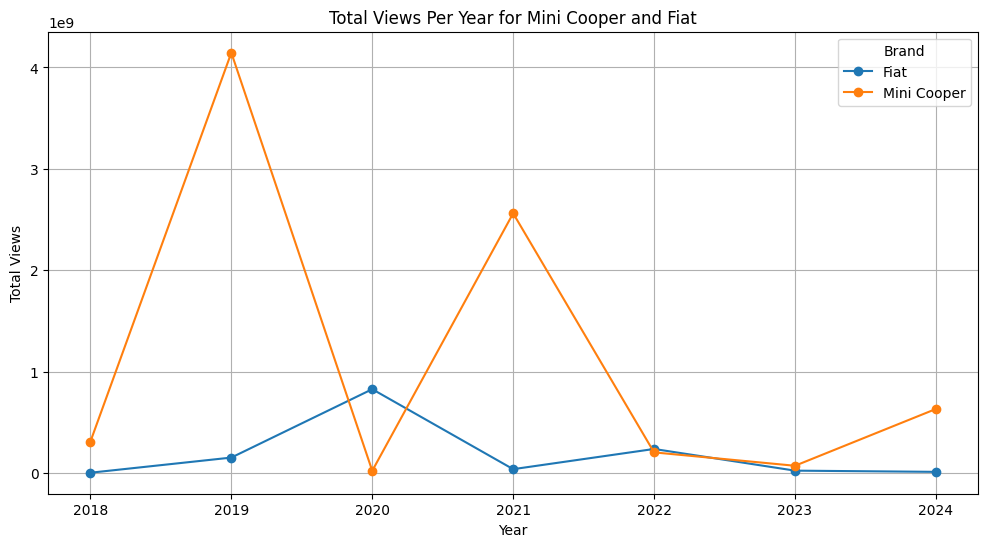

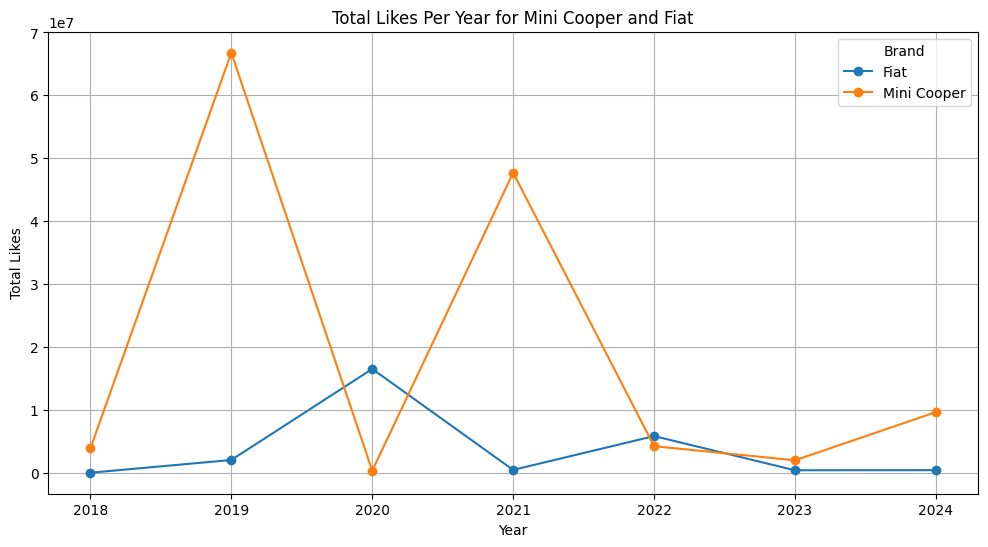

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets containing engagement data for Mini Cooper and Fiat
mini_cooper_engagement = pd.read_csv('/Users/abhishekroy/Downloads/vscode folder/video_engagement_metrics.csv')
fiat_engagement = pd.read_csv('/Users/abhishekroy/Downloads/vscode folder/youtube_engagement_dataset.csv')

# Standardize column names
mini_cooper_engagement.rename(columns={'video_id': 'video_url'}, inplace=True)
fiat_engagement['video_url'] = fiat_engagement['video_url'].str.split('=').str[-1]  # Extract video ID from URL

# Add a 'brand' column to identify the brand
mini_cooper_engagement['brand'] = 'Mini Cooper'
fiat_engagement['brand'] = 'Fiat'

# Combine the datasets into one DataFrame
combined_engagement = pd.concat([mini_cooper_engagement, fiat_engagement])

# Load publish dates from the original datasets to match with video engagement
mini_cooper_cleaned_data = pd.read_csv('/Users/abhishekroy/Downloads/vscode folder/Xcleaned_mini_cooper_comments.csv')
fiat_cleaned_data = pd.read_csv('/Users/abhishekroy/Downloads/vscode folder/translated_comments_with_plain_texts.csv')

# Ensure `video_url` is consistent in the cleaned data
mini_cooper_cleaned_data['video_url'] = mini_cooper_cleaned_data['video_url'].str.split('=').str[-1]
fiat_cleaned_data['video_url'] = fiat_cleaned_data['video_url'].str.split('=').str[-1]

# Standardize and combine the publish date information
mini_cooper_cleaned_data['brand'] = 'Mini Cooper'
fiat_cleaned_data['brand'] = 'Fiat'
combined_cleaned_data = pd.concat([mini_cooper_cleaned_data[['video_url', 'publish_date', 'brand']], 
                                   fiat_cleaned_data[['video_url', 'publish_date', 'brand']]])

# Merge publish dates with the engagement data
combined_engagement = pd.merge(combined_engagement, combined_cleaned_data, on=['video_url', 'brand'], how='left')

# Ensure the publish_date is in datetime format
combined_engagement['publish_date'] = pd.to_datetime(combined_engagement['publish_date']).dt.tz_localize(None)
combined_engagement['year'] = combined_engagement['publish_date'].dt.year

# Drop rows where `publish_date` is NaT or `year` is NaN
combined_engagement.dropna(subset=['publish_date', 'year'], inplace=True)

# Convert engagement metrics to numeric, handling errors by coercing non-numeric values to NaN
combined_engagement[['view_count', 'like_count', 'dislike_count', 'comment_count']] = combined_engagement[
    ['view_count', 'like_count', 'dislike_count', 'comment_count']].apply(pd.to_numeric, errors='coerce')

# Check for unique brands and data availability
print("Unique brands in the dataset:", combined_engagement['brand'].unique())

# Check for Fiat data availability after merge
fiat_data_post_merge = combined_engagement[combined_engagement['brand'] == 'Fiat']
print(f"Fiat data availability after merge: {fiat_data_post_merge.shape[0]} rows")

# Calculate total views and total likes per year and brand
total_engagement_per_year = combined_engagement.groupby(['year', 'brand'])[['view_count', 'like_count']].sum()

# Plot the total views per year for each brand
total_engagement_per_year['view_count'].unstack().plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Total Views Per Year for Mini Cooper and Fiat')
plt.xlabel('Year')
plt.ylabel('Total Views')
plt.legend(title='Brand')
plt.grid(True)
plt.show()

# Plot the total likes per year for each brand
total_engagement_per_year['like_count'].unstack().plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Total Likes Per Year for Mini Cooper and Fiat')
plt.xlabel('Year')
plt.ylabel('Total Likes')
plt.legend(title='Brand')
plt.grid(True)
plt.show()


### Checking Overlap Between Fiat Engagement and Cleaned Data

In this step, I aimed to align the video URLs between two datasets related to Fiat: one containing engagement metrics and another containing cleaned comment data. The key actions performed include:

1. **Ensuring URL Consistency:**
   - The `video_url` field was standardized in both datasets to ensure consistency. This involved splitting the URL to retain only the video ID portion.

2. **Comparison of Video URLs:**
   - A sample of video URLs from both datasets was printed to ensure the standardization was successful and consistent across both datasets.

3. **Overlap Check:**
   - The script checked for overlaps between the `video_url` columns in the two datasets. This was essential to determine how many videos had corresponding entries in both the engagement data and the cleaned comment data.

This step was crucial for subsequent analyses, ensuring that the engagement metrics and comment data could be accurately compared and combined for deeper insights.


In [35]:
import pandas as pd

# Load the datasets containing engagement data for Fiat
fiat_engagement = pd.read_csv('/Users/abhishekroy/Downloads/vscode folder/youtube_engagement_dataset.csv')
fiat_cleaned_data = pd.read_csv('/Users/abhishekroy/Downloads/vscode folder/translated_comments_with_plain_texts.csv')

# Ensure `video_url` is consistent in both datasets
fiat_engagement['video_url'] = fiat_engagement['video_url'].str.split('=').str[-1]
fiat_cleaned_data['video_url'] = fiat_cleaned_data['video_url'].str.split('=').str[-1]

# Print out a few video URLs from both datasets to compare
print("Fiat Engagement Video URLs (first 5):")
print(fiat_engagement['video_url'].head())

print("\nFiat Cleaned Data Video URLs (first 5):")
print(fiat_cleaned_data['video_url'].head())

# Check for overlaps between the two datasets
overlap = fiat_engagement['video_url'].isin(fiat_cleaned_data['video_url']).sum()
print(f"\nNumber of matching video URLs between engagement and cleaned data: {overlap}")


Fiat Engagement Video URLs (first 5):
0    lbKk1Xc2IP0
1    CkvxrfUmPe4
2    iSd8W3ae1c0
3    2xZ1WpY5D78
4    ij9gv7m-gxk
Name: video_url, dtype: object

Fiat Cleaned Data Video URLs (first 5):
0    lbKk1Xc2IP0
1    lbKk1Xc2IP0
2    lbKk1Xc2IP0
3    lbKk1Xc2IP0
4    lbKk1Xc2IP0
Name: video_url, dtype: object

Number of matching video URLs between engagement and cleaned data: 270


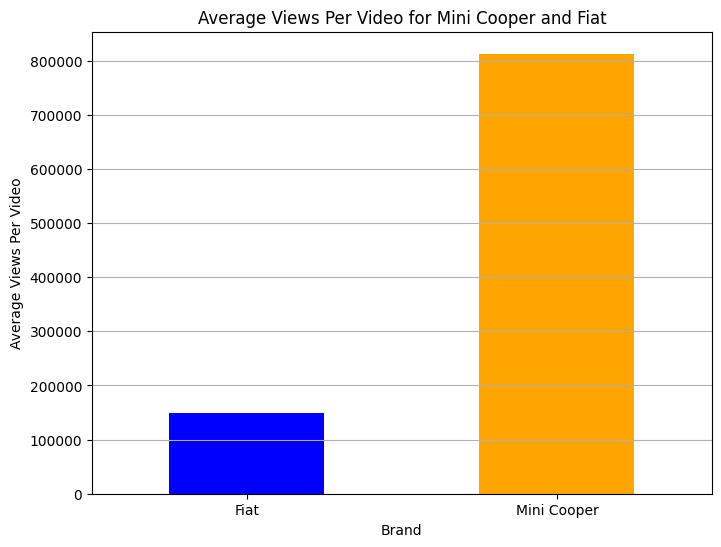

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets containing engagement data for Mini Cooper and Fiat
mini_cooper_engagement = pd.read_csv('/Users/abhishekroy/Downloads/vscode folder/video_engagement_metrics.csv')
fiat_engagement = pd.read_csv('/Users/abhishekroy/Downloads/vscode folder/youtube_engagement_dataset.csv')

# Standardize column names
mini_cooper_engagement.rename(columns={'video_id': 'video_url'}, inplace=True)
fiat_engagement['video_url'] = fiat_engagement['video_url'].str.split('=').str[-1]  # Extract video ID from URL

# Add a 'brand' column to identify the brand
mini_cooper_engagement['brand'] = 'Mini Cooper'
fiat_engagement['brand'] = 'Fiat'

# Combine the datasets into one DataFrame
combined_engagement = pd.concat([mini_cooper_engagement, fiat_engagement])

# Load publish dates from the original datasets to match with video engagement
mini_cooper_cleaned_data = pd.read_csv('/Users/abhishekroy/Downloads/vscode folder/Xcleaned_mini_cooper_comments.csv')
fiat_cleaned_data = pd.read_csv('/Users/abhishekroy/Downloads/vscode folder/translated_comments_with_plain_texts.csv')

# Ensure `video_url` is consistent in the cleaned data
mini_cooper_cleaned_data['video_url'] = mini_cooper_cleaned_data['video_url'].str.split('=').str[-1]
fiat_cleaned_data['video_url'] = fiat_cleaned_data['video_url'].str.split('=').str[-1]

# Standardize and combine the publish date information
mini_cooper_cleaned_data['brand'] = 'Mini Cooper'
fiat_cleaned_data['brand'] = 'Fiat'
combined_cleaned_data = pd.concat([mini_cooper_cleaned_data[['video_url', 'publish_date', 'brand']], 
                                   fiat_cleaned_data[['video_url', 'publish_date', 'brand']]])

# Merge publish dates with the engagement data
combined_engagement = pd.merge(combined_engagement, combined_cleaned_data, on=['video_url', 'brand'], how='left')

# Ensure the publish_date is in datetime format
combined_engagement['publish_date'] = pd.to_datetime(combined_engagement['publish_date']).dt.tz_localize(None)
combined_engagement['year'] = combined_engagement['publish_date'].dt.year

# Drop rows where `publish_date` is NaT or `year` is NaN
combined_engagement.dropna(subset=['publish_date', 'year'], inplace=True)

# Convert engagement metrics to numeric, handling errors by coercing non-numeric values to NaN
combined_engagement[['view_count', 'like_count', 'dislike_count', 'comment_count']] = combined_engagement[
    ['view_count', 'like_count', 'dislike_count', 'comment_count']].apply(pd.to_numeric, errors='coerce')

# Calculate the average views per video across all years
avg_views_per_video = combined_engagement.groupby('brand')['view_count'].mean()

# Plot the average views per video for each brand as a bar plot
avg_views_per_video.plot(kind='bar', color=['blue', 'orange'], figsize=(8, 6))
plt.title('Average Views Per Video for Mini Cooper and Fiat')
plt.xlabel('Brand')
plt.ylabel('Average Views Per Video')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


### Engagement Analysis: Mini Cooper vs. Fiat

In this step, the engagement metrics of YouTube videos for Mini Cooper and Fiat were analyzed, specifically focusing on the average views and likes per video for each brand. The process involved several key actions:

1. **Data Preparation:**
   - Datasets containing engagement metrics for both Mini Cooper and Fiat were loaded and standardized. This included renaming columns for consistency and extracting video IDs from URLs.
   - A `brand` column was added to differentiate between Mini Cooper and Fiat videos.

2. **Merging Engagement and Publish Date Information:**
   - Publish dates from original datasets were merged with the engagement data to associate each video with its corresponding engagement metrics.
   - Any rows with missing publish dates or invalid years were dropped to ensure data accuracy.

3. **Conversion of Engagement Metrics:**
   - Engagement metrics (views, likes, dislikes, comments) were converted to numeric values, with any non-numeric values coerced to `NaN` and subsequently handled.

4. **Calculating and Visualizing Average Engagement Metrics:**
   - **Average Views Per Video:** Calculated the average number of views per video for each brand across all years and visualized the results in a bar plot.
   - **Average Likes Per Video:** Similarly, calculated and visualized the average number of likes per video for each brand.

These visualizations provide a clear comparison of engagement levels between Mini Cooper and Fiat, highlighting differences in audience interaction through views and likes.


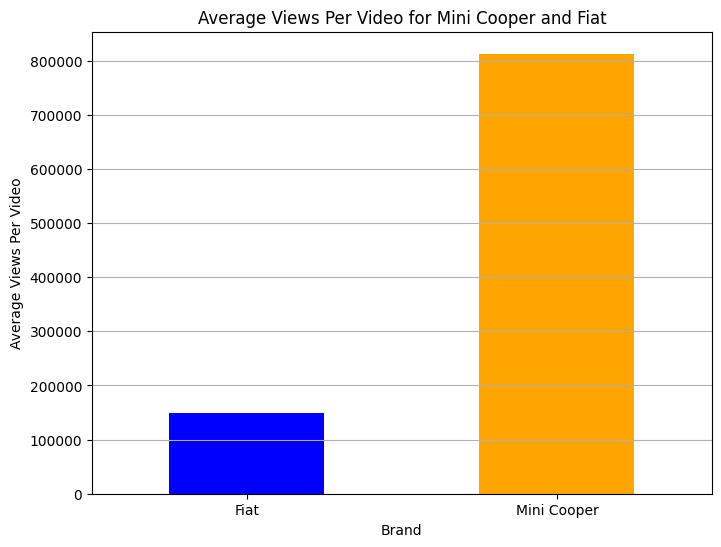

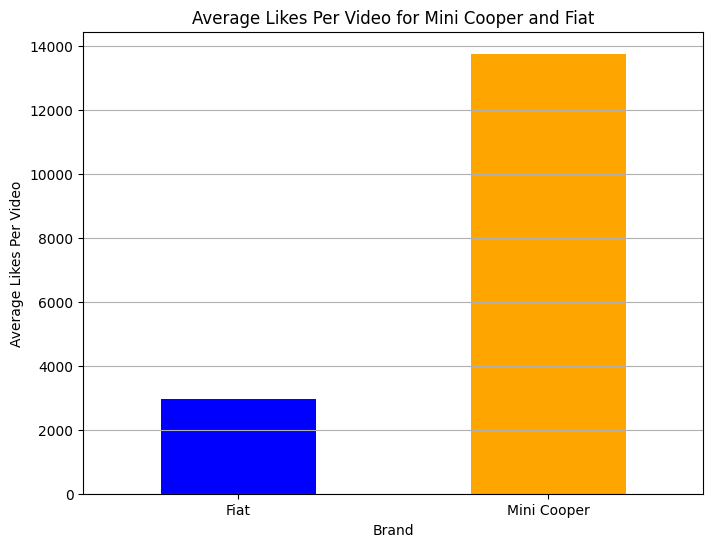

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets containing engagement data for Mini Cooper and Fiat
mini_cooper_engagement = pd.read_csv('/Users/abhishekroy/Downloads/vscode folder/video_engagement_metrics.csv')
fiat_engagement = pd.read_csv('/Users/abhishekroy/Downloads/vscode folder/youtube_engagement_dataset.csv')

# Standardize column names
mini_cooper_engagement.rename(columns={'video_id': 'video_url'}, inplace=True)
fiat_engagement['video_url'] = fiat_engagement['video_url'].str.split('=').str[-1]  # Extract video ID from URL

# Add a 'brand' column to identify the brand
mini_cooper_engagement['brand'] = 'Mini Cooper'
fiat_engagement['brand'] = 'Fiat'

# Combine the datasets into one DataFrame
combined_engagement = pd.concat([mini_cooper_engagement, fiat_engagement])

# Load publish dates from the original datasets to match with video engagement
mini_cooper_cleaned_data = pd.read_csv('/Users/abhishekroy/Downloads/vscode folder/Xcleaned_mini_cooper_comments.csv')
fiat_cleaned_data = pd.read_csv('/Users/abhishekroy/Downloads/vscode folder/translated_comments_with_plain_texts.csv')

# Ensure `video_url` is consistent in the cleaned data
mini_cooper_cleaned_data['video_url'] = mini_cooper_cleaned_data['video_url'].str.split('=').str[-1]
fiat_cleaned_data['video_url'] = fiat_cleaned_data['video_url'].str.split('=').str[-1]

# Standardize and combine the publish date information
mini_cooper_cleaned_data['brand'] = 'Mini Cooper'
fiat_cleaned_data['brand'] = 'Fiat'
combined_cleaned_data = pd.concat([mini_cooper_cleaned_data[['video_url', 'publish_date', 'brand']], 
                                   fiat_cleaned_data[['video_url', 'publish_date', 'brand']]])

# Merge publish dates with the engagement data
combined_engagement = pd.merge(combined_engagement, combined_cleaned_data, on=['video_url', 'brand'], how='left')

# Ensure the publish_date is in datetime format
combined_engagement['publish_date'] = pd.to_datetime(combined_engagement['publish_date']).dt.tz_localize(None)
combined_engagement['year'] = combined_engagement['publish_date'].dt.year

# Drop rows where `publish_date` is NaT or `year` is NaN
combined_engagement.dropna(subset=['publish_date', 'year'], inplace=True)

# Convert engagement metrics to numeric, handling errors by coercing non-numeric values to NaN
combined_engagement[['view_count', 'like_count', 'dislike_count', 'comment_count']] = combined_engagement[
    ['view_count', 'like_count', 'dislike_count', 'comment_count']].apply(pd.to_numeric, errors='coerce')

# Calculate the average views per video across all years
avg_views_per_video = combined_engagement.groupby('brand')['view_count'].mean()

# Calculate the average likes per video across all years
avg_likes_per_video = combined_engagement.groupby('brand')['like_count'].mean()

# Plot the average views per video for each brand as a bar plot
avg_views_per_video.plot(kind='bar', color=['blue', 'orange'], figsize=(8, 6))
plt.title('Average Views Per Video for Mini Cooper and Fiat')
plt.xlabel('Brand')
plt.ylabel('Average Views Per Video')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Plot the average likes per video for each brand as a bar plot
avg_likes_per_video.plot(kind='bar', color=['blue', 'orange'], figsize=(8, 6))
plt.title('Average Likes Per Video for Mini Cooper and Fiat')
plt.xlabel('Brand')
plt.ylabel('Average Likes Per Video')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


### Comparative Analysis of Engagement Metrics for Mini Cooper and Fiat

#### Average Views Per Video
The first bar plot reveals that Mini Cooper significantly outperforms Fiat in terms of average views per video on YouTube. Mini Cooper's videos achieve an average of over 800,000 views per video, whereas Fiat's videos average just over 100,000 views. This stark contrast indicates that Mini Cooper's content is more engaging or has a broader reach compared to Fiat's.

#### Average Likes Per Video
The second bar plot shows a similar trend in terms of likes. Mini Cooper's videos receive an average of over 14,000 likes per video, while Fiat's videos average around 2,000 likes per video. This suggests that not only does Mini Cooper's content attract more viewers, but it also generates more positive engagement in the form of likes.

Overall, these metrics highlight that Mini Cooper has a more effective YouTube presence compared to Fiat, both in terms of attracting views and generating positive user interactions.


In [38]:
import pandas as pd

# Load the datasets containing engagement data for Mini Cooper and Fiat
mini_cooper_engagement = pd.read_csv('/Users/abhishekroy/Downloads/vscode folder/video_engagement_metrics.csv')
fiat_engagement = pd.read_csv('/Users/abhishekroy/Downloads/vscode folder/youtube_engagement_dataset.csv')

# Standardize column names
mini_cooper_engagement.rename(columns={'video_id': 'video_url'}, inplace=True)
fiat_engagement['video_url'] = fiat_engagement['video_url'].str.split('=').str[-1]  # Extract video ID from URL

# Add a 'brand' column to identify the brand
mini_cooper_engagement['brand'] = 'Mini Cooper'
fiat_engagement['brand'] = 'Fiat'

# Combine the datasets into one DataFrame
combined_engagement = pd.concat([mini_cooper_engagement, fiat_engagement])

# Convert view_count to numeric for sorting
combined_engagement['view_count'] = pd.to_numeric(combined_engagement['view_count'], errors='coerce')

# Identify the top 10 most-watched videos for each brand
top_10_mini_cooper = combined_engagement[combined_engagement['brand'] == 'Mini Cooper'].nlargest(10, 'view_count')[['video_url', 'view_count', 'brand']]
top_10_fiat = combined_engagement[combined_engagement['brand'] == 'Fiat'].nlargest(10, 'view_count')[['video_url', 'view_count', 'brand']]

# Display the top 10 most-watched videos for Mini Cooper
print("Top 10 Most-Watched Videos for Mini Cooper:")
print(top_10_mini_cooper)

# Display the top 10 most-watched videos for Fiat
print("\nTop 10 Most-Watched Videos for Fiat:")
print(top_10_fiat)

# Combine the top 10 lists for comparison
top_10_combined = pd.concat([top_10_mini_cooper, top_10_fiat]).reset_index(drop=True)

# Display the combined top 10 list
print("\nCombined Top 10 Most-Watched Videos for Comparison:")
print(top_10_combined)


Top 10 Most-Watched Videos for Mini Cooper:
       video_url  view_count        brand
567  3P-xKFIsSw8    12732895  Mini Cooper
267  5Ug8jzSwn8o     4590168  Mini Cooper
502  eWjmadll34Q     4500834  Mini Cooper
185  UpY43w3phvA     4347732  Mini Cooper
233  5UtyiLyXrkI     3049363  Mini Cooper
62   RWhrf-wKoqU     2505048  Mini Cooper
533  FqhEyF9x7GE     2359695  Mini Cooper
538  H18X6JIVkPk     2345549  Mini Cooper
526  1FqBpmw4UaE     1776282  Mini Cooper
22   srQEyl8it2c     1682673  Mini Cooper

Top 10 Most-Watched Videos for Fiat:
       video_url  view_count brand
60   MIlhPK9t0vU     2590151  Fiat
179  jd7nIAQ-JW4      458511  Fiat
10   hK8nx1d1wgk      425607  Fiat
7    woD1u2xVBkw      401494  Fiat
105  56FN6OKzukM      335117  Fiat
246  TXbb4LyKtMY      261243  Fiat
226  If50Yl621yc      258202  Fiat
242  bXR0F26gefo      243720  Fiat
138  WaG4QoovK78      211861  Fiat
178  pijyB62jKz0      210473  Fiat

Combined Top 10 Most-Watched Videos for Comparison:
      video_url  v

### Analysis of Top 10 Most-Watched Videos for Mini Cooper and Fiat

In this step, the top 10 most-watched videos for both Mini Cooper and Fiat were identified and analyzed based on their view counts. Here's a summary of the process:

1. **Data Preparation:**
   - Engagement data from both Mini Cooper and Fiat were loaded and standardized.
   - The `view_count` column was converted to a numeric format to facilitate sorting.

2. **Identification of Top 10 Videos:**
   - The top 10 most-watched videos for each brand were extracted based on the highest view counts.
   - These lists were combined to allow for a direct comparison between Mini Cooper and Fiat.

3. **Channel Identification:**
   - The corresponding channel titles for these top videos were identified by matching the video URLs from the comments dataset.
   - The channel titles were then added to the final dataset for additional context.

4. **Final Output:**
   - The final output includes the video URLs, view counts, brand, and channel titles for the top 10 most-watched videos from both Mini Cooper and Fiat.

This analysis helps to understand which channels are driving the highest engagement for these brands and could provide insights into content strategies that resonate most with audiences.


In [39]:
import pandas as pd

# Load the datasets containing engagement data for Mini Cooper and Fiat
mini_cooper_engagement = pd.read_csv('/Users/abhishekroy/Downloads/vscode folder/video_engagement_metrics.csv')
fiat_engagement = pd.read_csv('/Users/abhishekroy/Downloads/vscode folder/youtube_engagement_dataset.csv')

# Standardize column names
mini_cooper_engagement.rename(columns={'video_id': 'video_url'}, inplace=True)
fiat_engagement['video_url'] = fiat_engagement['video_url'].str.split('=').str[-1]  # Extract video ID from URL

# Add a 'brand' column to identify the brand
mini_cooper_engagement['brand'] = 'Mini Cooper'
fiat_engagement['brand'] = 'Fiat'

# Combine the datasets into one DataFrame
combined_engagement = pd.concat([mini_cooper_engagement, fiat_engagement])

# Convert view_count to numeric for sorting
combined_engagement['view_count'] = pd.to_numeric(combined_engagement['view_count'], errors='coerce')

# Identify the top 10 most-watched videos for each brand
top_10_mini_cooper = combined_engagement[combined_engagement['brand'] == 'Mini Cooper'].nlargest(10, 'view_count')[['video_url', 'view_count', 'brand']]
top_10_fiat = combined_engagement[combined_engagement['brand'] == 'Fiat'].nlargest(10, 'view_count')[['video_url', 'view_count', 'brand']]

# Combine the top 10 lists for comparison
top_10_combined = pd.concat([top_10_mini_cooper, top_10_fiat]).reset_index(drop=True)

# Load the datasets containing video comments data
mini_cooper_comments = pd.read_csv('/Users/abhishekroy/Downloads/vscode folder/video_comments.csv')
fiat_comments = pd.read_csv('/Users/abhishekroy/Downloads/vscode folder/translated_comments_with_plain_texts.csv')

# Combine the comments datasets
combined_comments = pd.concat([mini_cooper_comments, fiat_comments])

# Perform the contains check and merge
def get_channel_title(row):
    match = combined_comments[combined_comments['video_url'].str.contains(row['video_url'], na=False)]
    if not match.empty:
        return match['channel_title'].iloc[0]
    else:
        return None

# Apply the function to get channel titles
top_10_combined['channel_title'] = top_10_combined.apply(get_channel_title, axis=1)

# Select relevant columns for final output
final_output = top_10_combined[['video_url', 'view_count', 'brand', 'channel_title']]

# Display the final result
print(final_output)


      video_url  view_count        brand                channel_title
0   3P-xKFIsSw8    12732895  Mini Cooper              MOVIE PREDICTOR
1   5Ug8jzSwn8o     4590168  Mini Cooper                  Faisal Khan
2   eWjmadll34Q     4500834  Mini Cooper           Sourav Joshi Vlogs
3   UpY43w3phvA     4347732  Mini Cooper        Fat Biker Vaibhav TWO
4   5UtyiLyXrkI     3049363  Mini Cooper       Kathukuren Thalaivarey
5   RWhrf-wKoqU     2505048  Mini Cooper                 MINI Türkiye
6   FqhEyF9x7GE     2359695  Mini Cooper                   Kallmekris
7   H18X6JIVkPk     2345549  Mini Cooper           Aayu and Pihu Show
8   1FqBpmw4UaE     1776282  Mini Cooper               The Ninja Fam!
9   srQEyl8it2c     1682673  Mini Cooper                        TFLEV
10  MIlhPK9t0vU     2590151         Fiat            Lateco Braxatoris
11  jd7nIAQ-JW4      458511         Fiat  Driver View - سليمان السعيد
12  hK8nx1d1wgk      425607         Fiat                Megan Collins
13  woD1u2xVBkw     

In [42]:
channel_info_df.head

<bound method NDFrame.head of       video_url  view_count        brand                channel_title  \
0   3P-xKFIsSw8    12732895  Mini Cooper              MOVIE PREDICTOR   
1   5Ug8jzSwn8o     4590168  Mini Cooper                  Faisal Khan   
2   eWjmadll34Q     4500834  Mini Cooper           Sourav Joshi Vlogs   
3   UpY43w3phvA     4347732  Mini Cooper        Fat Biker Vaibhav TWO   
4   5UtyiLyXrkI     3049363  Mini Cooper       Kathukuren Thalaivarey   
5   RWhrf-wKoqU     2505048  Mini Cooper                 MINI Türkiye   
6   FqhEyF9x7GE     2359695  Mini Cooper                   Kallmekris   
7   H18X6JIVkPk     2345549  Mini Cooper           Aayu and Pihu Show   
8   1FqBpmw4UaE     1776282  Mini Cooper               The Ninja Fam!   
9   srQEyl8it2c     1682673  Mini Cooper                        TFLEV   
10  MIlhPK9t0vU     2590035         Fiat            Lateco Braxatoris   
11  jd7nIAQ-JW4      458485         Fiat  Driver View - سليمان السعيد   
12  hK8nx1d1wgk      

### Virtual Reach Analysis: Subscriber Count Comparison for Mini Cooper and Fiat

In this step, the analysis focused on comparing the virtual reach of both Mini Cooper and Fiat by examining the subscriber counts of the top YouTube channels associated with each brand. Here's a summary of the process and findings:

1. **Data Collection:**
   - Subscriber counts for the top channels associated with Mini Cooper and Fiat were gathered and saved in a CSV file.

2. **Summary Statistics:**
   - The summary statistics (mean, standard deviation, etc.) of subscriber counts were calculated for each brand.
   - This provided an overview of the average reach of opinion leaders (YouTube channels) promoting or discussing each brand.

3. **Visualization:**
   - **Bar Chart:** A bar chart was plotted to compare the average subscriber counts for Mini Cooper and Fiat. This visualization highlighted the difference in the average reach per channel between the two brands.
   - **Box Plot:** A box plot was used to compare the distribution of subscriber counts. This provided insights into the variability of subscriber counts among the channels associated with each brand.

4. **Statistical Analysis:**
   - A t-test was conducted to determine if the difference in subscriber counts between the two brands is statistically significant.
   - The results showed the t-statistic and p-value, providing a statistical basis for assessing whether one brand's associated channels generally have more reach than the other's.

This analysis is crucial for understanding the potential audience size and engagement level each brand can achieve through YouTube, which can inform future marketing strategies and collaborations.


Summary statistics of subscriber counts by brand:
             count       mean           std      min       25%        50%  \
brand                                                                       
Fiat          10.0   196020.0  2.435578e+05  54300.0   71875.0   108100.0   
Mini Cooper   10.0  5309280.0  7.668638e+06  14300.0  284500.0  1085000.0   

                   75%         max  
brand                               
Fiat          164250.0    850000.0  
Mini Cooper  8150000.0  22100000.0  


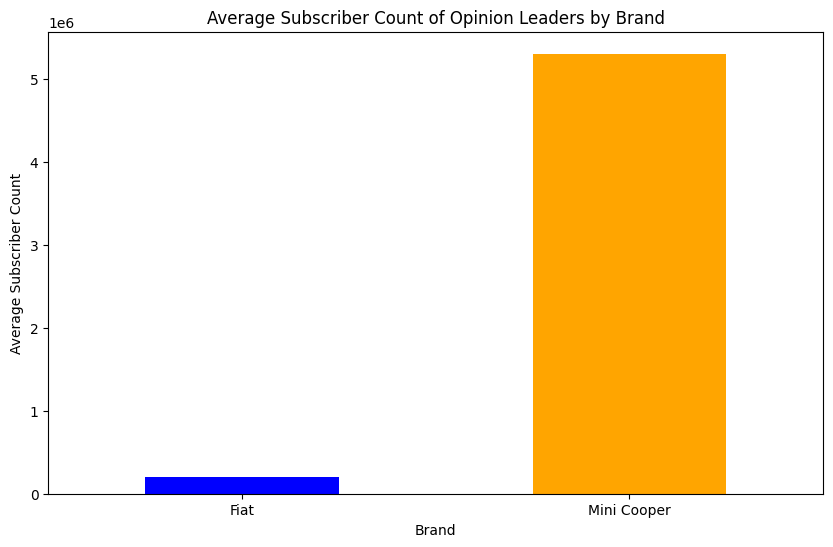

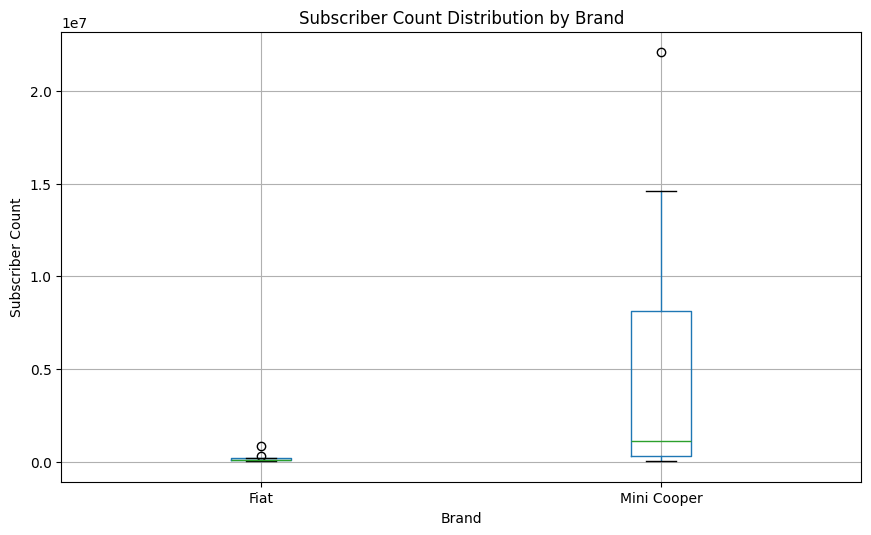

T-statistic: 2.10746652303274, P-value: 0.04936256679071141


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load the YouTube channel info CSV file
channel_info_df = pd.read_csv('/Users/abhishekroy/Downloads/vscode folder/YouTube_Channel_Info.csv')

# Group by brand and calculate the summary statistics for subscriber counts
subscriber_summary = channel_info_df.groupby('brand')['subscriber_count'].describe()

# Display the summary statistics
print("Summary statistics of subscriber counts by brand:")
print(subscriber_summary)

# Bar chart comparing average subscriber counts for each brand
avg_subscribers = channel_info_df.groupby('brand')['subscriber_count'].mean()

avg_subscribers.plot(kind='bar', figsize=(10, 6), color=['blue', 'orange'])
plt.title('Average Subscriber Count of Opinion Leaders by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Subscriber Count')
plt.xticks(rotation=0)
plt.show()

# Box plot to compare the distribution of subscriber counts for each brand
channel_info_df.boxplot(column='subscriber_count', by='brand', figsize=(10, 6))
plt.title('Subscriber Count Distribution by Brand')
plt.suptitle('')  # Suppress the automatic 'Boxplot grouped by brand' title
plt.xlabel('Brand')
plt.ylabel('Subscriber Count')
plt.show()

# Separate subscriber counts for each brand
mini_cooper_subs = channel_info_df[channel_info_df['brand'] == 'Mini Cooper']['subscriber_count']
fiat_subs = channel_info_df[channel_info_df['brand'] == 'Fiat']['subscriber_count']

# Perform a t-test to see if the differences are statistically significant
t_stat, p_value = ttest_ind(mini_cooper_subs, fiat_subs)

print(f"T-statistic: {t_stat}, P-value: {p_value}")


### Filtering Comments for Topic Modeling in High-Engagement Years

In this step, the focus was on identifying the key topics discussed during the years of highest engagement for both Mini Cooper and Fiat. By filtering the comments from those specific years, the goal was to perform topic modeling and uncover the themes that resonated most with the audience.

1. **Data Preparation:**
   - **Mini Cooper (2019):** The dataset was filtered to include only the comments from videos published in 2019, a year identified as having high engagement for Mini Cooper.
   - **Fiat (2020):** Similarly, comments from Fiat videos published in 2020 were filtered, as this year had the highest engagement for Fiat.

2. **Data Filtering:**
   - The `publish_date` field was used to filter the comments by year.
   - For Mini Cooper, 2019 was selected, resulting in a dataset specific to that year.
   - For Fiat, 2020 was selected to capture the comments during its peak engagement period.

3. **Results:**
   - The number of comments filtered for each brand in the respective years was displayed to ensure the datasets were prepared correctly for subsequent topic modeling.
   - These filtered datasets were saved as CSV files for further analysis.

This process set the stage for performing topic modeling on the comments from the years with the highest engagement, allowing for a deeper understanding of what drove user interaction during those periods.


In [17]:
import pandas as pd

# Load the cleaned comments data for Mini Cooper and Fiat
mini_cooper_cleaned_data = pd.read_csv('/Users/abhishekroy/Downloads/vscode folder/Xcleaned_mini_cooper_comments.csv')
fiat_cleaned_data = pd.read_csv('/Users/abhishekroy/Downloads/vscode folder/translated_comments_with_plain_texts.csv')

# Ensure `video_url` is consistent in the cleaned data
mini_cooper_cleaned_data['video_url'] = mini_cooper_cleaned_data['video_url'].str.split('=').str[-1]
fiat_cleaned_data['video_url'] = fiat_cleaned_data['video_url'].str.split('=').str[-1]

# Ensure the publish_date is in datetime format
mini_cooper_cleaned_data['publish_date'] = pd.to_datetime(mini_cooper_cleaned_data['publish_date'])
fiat_cleaned_data['publish_date'] = pd.to_datetime(fiat_cleaned_data['publish_date'])

# Filter the comments for Mini Cooper in 2019
mini_cooper_2019_comments = mini_cooper_cleaned_data[
    (mini_cooper_cleaned_data['publish_date'].dt.year == 2019)
]

# Filter the comments for Fiat in 2020
fiat_2020_comments = fiat_cleaned_data[
    (fiat_cleaned_data['publish_date'].dt.year == 2020)
]

# Display the number of comments filtered
print(f"Total Mini Cooper comments in 2019: {mini_cooper_2019_comments.shape[0]}")
print(f"Total Fiat comments in 2020: {fiat_2020_comments.shape[0]}")

# Optionally, save the filtered comments to new CSV files
mini_cooper_2019_comments.to_csv('/Users/abhishekroy/Downloads/mini_cooper_2019_comments.csv', index=False)
fiat_2020_comments.to_csv('/Users/abhishekroy/Downloads/fiat_2020_comments.csv', index=False)


Total Mini Cooper comments in 2019: 4216
Total Fiat comments in 2020: 4485


## getting topics or the time fiat had the highest engagement 

In [18]:
fiat_2020_comments.head

<bound method NDFrame.head of         video_url            channel_title              publish_date  \
193   hK8nx1d1wgk            Megan Collins 2020-12-13 11:36:24+00:00   
194   hK8nx1d1wgk            Megan Collins 2020-12-13 11:36:24+00:00   
195   hK8nx1d1wgk            Megan Collins 2020-12-13 11:36:24+00:00   
196   hK8nx1d1wgk            Megan Collins 2020-12-13 11:36:24+00:00   
197   hK8nx1d1wgk            Megan Collins 2020-12-13 11:36:24+00:00   
...           ...                      ...                       ...   
8510  Nf-ZqnFRFAE  yumi yoshida【吉田由美ちゃんねる】 2020-12-02 11:23:13+00:00   
8511  Nf-ZqnFRFAE  yumi yoshida【吉田由美ちゃんねる】 2020-12-02 11:23:13+00:00   
8512  Nf-ZqnFRFAE  yumi yoshida【吉田由美ちゃんねる】 2020-12-02 11:23:13+00:00   
8513  Nf-ZqnFRFAE  yumi yoshida【吉田由美ちゃんねる】 2020-12-02 11:23:13+00:00   
8514  Nf-ZqnFRFAE  yumi yoshida【吉田由美ちゃんねる】 2020-12-02 11:23:13+00:00   

      view_count                                            comment  \
193       420701              My e

### Topic Modeling on High-Engagement Year Comments

After filtering the comments for the year 2020, which had the highest engagement for Fiat, the next step involved performing topic modeling using Latent Dirichlet Allocation (LDA). The objective was to uncover the dominant topics discussed during this period of high interaction.

1. **Preprocessing:**
   - **Tokenization and Trigrams:** The text from the comments was preprocessed by removing stopwords and generating trigrams. Trigrams are sequences of three consecutive words, which help capture more context in the analysis.
   - **Corpus Creation:** A dictionary and corpus were created from the tokenized texts, essential for building the LDA model.

2. **Topic Modeling with LDA:**
   - **Coherence Score Calculation:** The LDA model was built with varying numbers of topics, ranging from 2 to 15. For each model, the coherence score was calculated, which measures the model's effectiveness in creating meaningful topics.
   - **Model Selection:** The coherence scores were used to identify the optimal number of topics for the dataset.

3. **Visualization:**
   - **Coherence Score Plot:** A plot of coherence scores against the number of topics was generated to help visualize the optimal number of topics. The peak coherence score typically indicates the best number of topics for the dataset.

This process helped to determine the key topics in the Fiat comments during the year 2020, providing insights into what drove user engagement during that period.


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abhishekroy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Number of Topics: 2, Coherence Score: 0.6538408672286515
Number of Topics: 3, Coherence Score: 0.6327963814769549
Number of Topics: 4, Coherence Score: 0.6408092352914327
Number of Topics: 5, Coherence Score: 0.6644964198540368
Number of Topics: 6, Coherence Score: 0.6274829681768114
Number of Topics: 7, Coherence Score: 0.5776407716946587
Number of Topics: 8, Coherence Score: 0.5690857195521932
Number of Topics: 9, Coherence Score: 0.5101809562595174
Number of Topics: 10, Coherence Score: 0.46860834556069575
Number of Topics: 11, Coherence Score: 0.5083315046537146
Number of Topics: 12, Coherence Score: 0.5213901462337134
Number of Topics: 13, Coherence Score: 0.490659475164931
Number of Topics: 14, Coherence Score: 0.5639973947881228


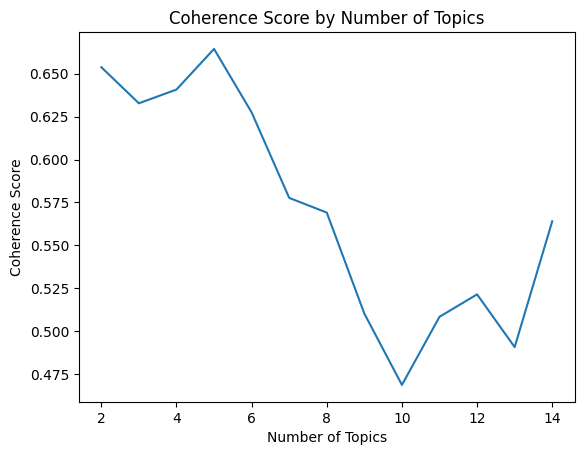

In [21]:
import pandas as pd
import gensim
import gensim.corpora as corpora
import nltk
from nltk.corpus import stopwords
from gensim.models import CoherenceModel
from nltk import ngrams
import random
import matplotlib.pyplot as plt

# Ensure NLTK resources are available
nltk.download('stopwords')

# Set random seed for reproducibility
random.seed(42)

# Define function to preprocess and tokenize text
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in gensim.utils.simple_preprocess(str(text)) if word not in stop_words]
    trigrams = list(ngrams(tokens, 3))
    trigram_tokens = ['_'.join(trigram) for trigram in trigrams]  # Join trigrams into single tokens
    return trigram_tokens if trigram_tokens else tokens

# Function to perform LDA and calculate coherence
def compute_coherence_values(df, start=2, limit=10, step=1):
    # Tokenize and create trigrams, ensuring all text is processed as strings
    processed_texts = df['translated_plain_texts'].dropna().map(preprocess_text)

    # Create Dictionary and Corpus
    id2word = corpora.Dictionary(processed_texts)
    corpus = [id2word.doc2bow(text) for text in processed_texts]

    coherence_values = []
    model_list = []
    
    for num_topics in range(start, limit, step):
        # Build LDA model
        lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=num_topics,
                                               random_state=42,
                                               passes=10,
                                               workers=2)
        model_list.append(lda_model)
        # Compute Coherence Score
        coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_texts, dictionary=id2word, coherence='c_v')
        coherence_score = coherence_model_lda.get_coherence()
        coherence_values.append(coherence_score)
        print(f'Number of Topics: {num_topics}, Coherence Score: {coherence_score}')
    
    return model_list, coherence_values

# Plot coherence values to find the optimal number of topics
def plot_coherence(coherence_values, start=2, limit=10, step=1):
    x = range(start, limit, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence Score")
    plt.title("Coherence Score by Number of Topics")
    plt.show()

# Load the Fiat dataset as a DataFrame
fiat_comments_df = pd.read_csv('/Users/abhishekroy/Downloads/fiat_2020_comments.csv')

# Compute coherence values for a range of topics
model_list, coherence_values = compute_coherence_values(fiat_comments_df, start=2, limit=15, step=1)

# Plot the coherence scores to visualize the optimal number of topics
plot_coherence(coherence_values, start=2, limit=15, step=1)


### Topic Modeling Visualization with Word Clouds

Following the identification of the optimal number of topics through coherence scores, the next step was to visualize the key topics within the Fiat 2020 comments using word clouds. The process involved:

1. **Preprocessing:**
   - The text data was preprocessed by removing stopwords and generating trigrams (three-word sequences). These trigrams were used as tokens for topic modeling, providing richer context for the analysis.

2. **LDA Topic Modeling:**
   - **Model Configuration:** The LDA model was built with a predefined number of topics, set to 5 in this case, based on the previous analysis of coherence scores.
   - **Topic Extraction:** The model generated a set of topics, each represented by a list of words. These words were weighted based on their relevance to the topic.

3. **Word Cloud Visualization:**
   - **Word Clouds:** For each topic identified by the LDA model, a word cloud was generated. The word cloud visually represents the importance of words in the topic, with larger words indicating higher relevance.
   - **Interpretation:** Each word cloud was analyzed to understand the main themes of the comments in the context of Fiat's engagement in 2020.

This approach allowed for a visual and intuitive interpretation of the topics, making it easier to grasp the underlying themes that resonated with the audience during a period of high engagement.


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abhishekroy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Topic 0: 0.009*"times" + 0.001*"nice_nice_girl" + 0.001*"even_people_syndrome" + 0.001*"engine_grande_punto" + 0.001*"real_hybrid_car" + 0.001*"heard" + 0.000*"rubbish" + 0.000*"al_rental_car" + 0.000*"average_fuel_consumption" + 0.000*"automatic_manual_gearboxes"


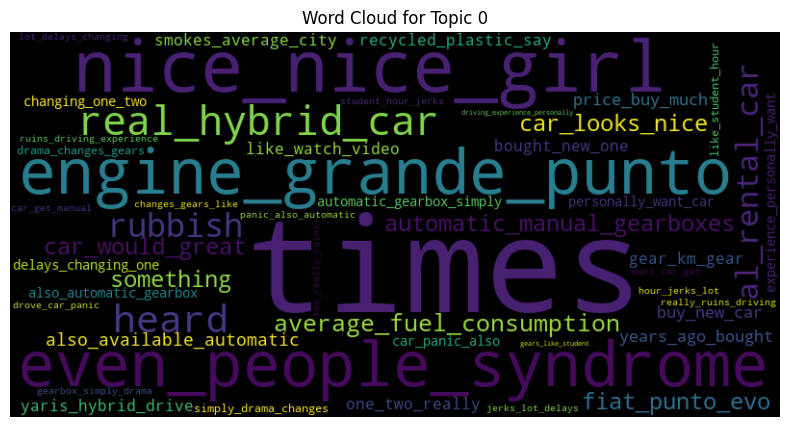

Topic 1: 0.001*"nice" + 0.001*"fiat" + 0.001*"already_looking_forward" + 0.001*"yumi_yumi_yumi" + 0.001*"small_car_burns" + 0.001*"press_second_step" + 0.001*"say_fiat_owner" + 0.000*"pretty" + 0.000*"litres_per_km" + 0.000*"girl"


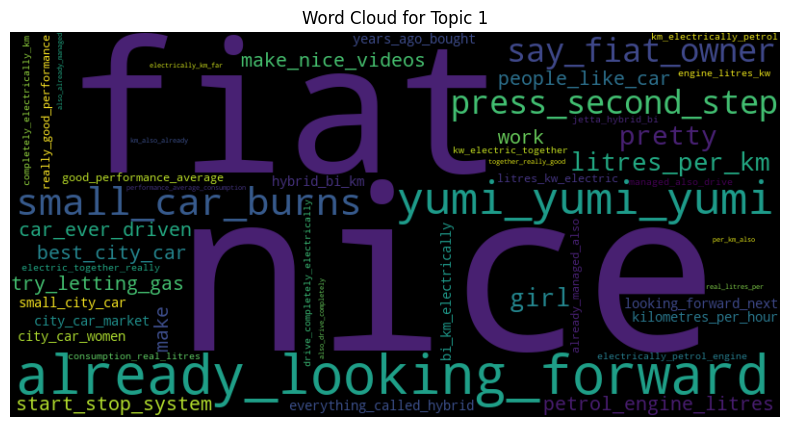

Topic 2: 0.001*"car" + 0.001*"moves_electric_motor" + 0.001*"motor_moves_electric" + 0.001*"electric_motor_moves" + 0.001*"beautiful" + 0.001*"love" + 0.001*"automatic" + 0.001*"costs_continue_run" + 0.001*"well_made_video" + 0.001*"typical_second_car"


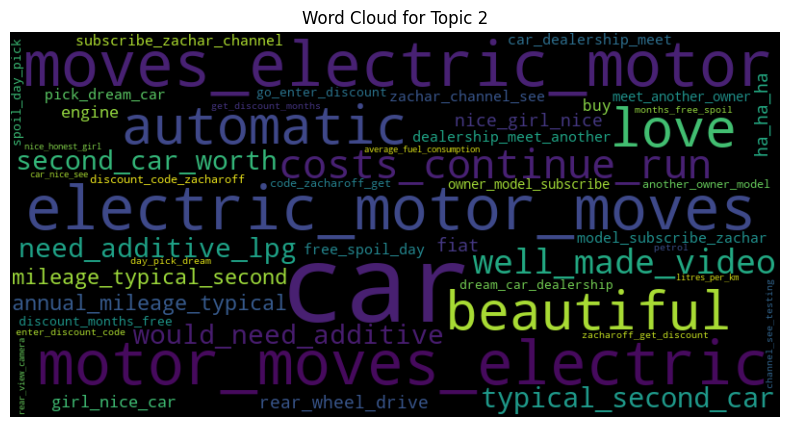

Topic 3: 0.001*"costing_thousands_zloty" + 0.001*"test" + 0.000*"cool" + 0.000*"toyota_yaris_hybrid" + 0.000*"fortunately_leased_months" + 0.000*"gco_hybrid_joke" + 0.000*"happy_return_months" + 0.000*"high_consumption_incorrect" + 0.000*"papers_say_gco" + 0.000*"part_fortunately_leased"


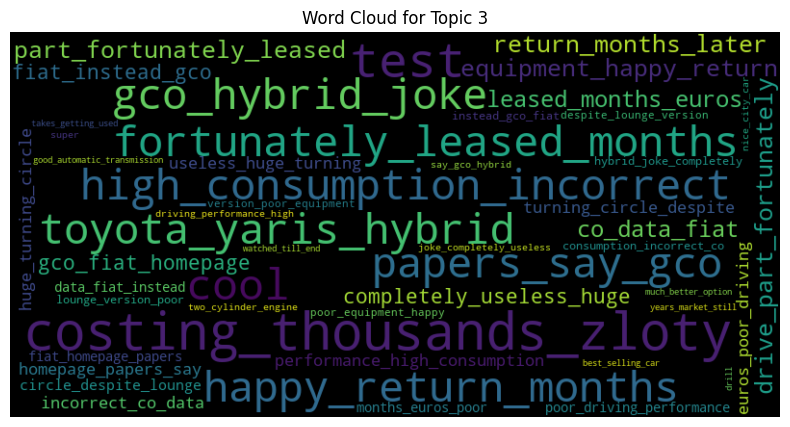

Topic 4: 0.001*"start" + 0.001*"omg" + 0.001*"sometimes_friendless_one" + 0.000*"times_good_luck" + 0.000*"keep_good_work" + 0.000*"episode" + 0.000*"want" + 0.000*"buy_new_car" + 0.000*"bought_first_car" + 0.000*"car_would_also"


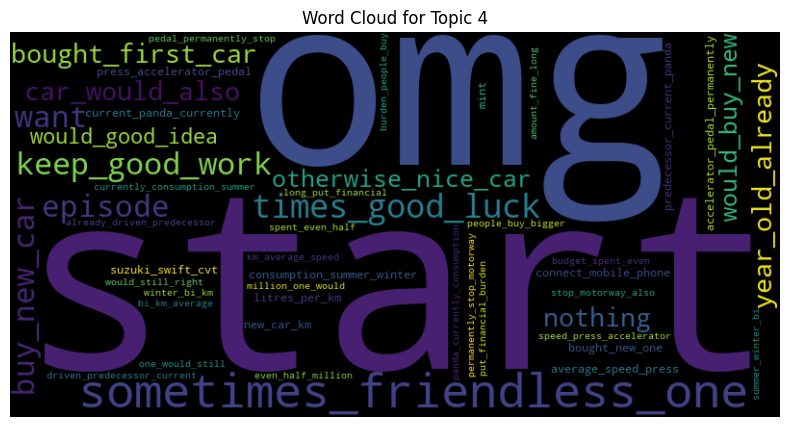

In [11]:
import pandas as pd
import gensim
import gensim.corpora as corpora
import nltk
from nltk.corpus import stopwords
from nltk import ngrams
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random
import warnings
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Suppress warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Ensure NLTK resources are available
nltk.download('stopwords')

# Set random seed for reproducibility
random.seed(42)

# Define function to preprocess and tokenize text
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in gensim.utils.simple_preprocess(str(text)) if word not in stop_words]
    trigrams = list(ngrams(tokens, 3))
    trigram_tokens = ['_'.join(trigram) for trigram in trigrams]  # Join trigrams into single tokens
    return trigram_tokens if trigram_tokens else tokens

# Function to perform LDA and visualize topics
def perform_topic_modeling(df, num_topics=5):
    # Tokenize and create trigrams
    processed_texts = df['translated_plain_texts'].dropna().map(preprocess_text)

    # Create Dictionary and Corpus
    id2word = corpora.Dictionary(processed_texts)
    corpus = [id2word.doc2bow(text) for text in processed_texts]

    # Build LDA model with the selected number of topics
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics,
                                           random_state=42,
                                           passes=10,
                                           workers=2)

    # Display the topics and generate word clouds
    topics = lda_model.print_topics()
    for idx, topic in topics:
        print(f'Topic {idx}: {topic}')
        wordcloud = WordCloud(width=800, height=400, random_state=42).generate_from_frequencies(dict(lda_model.show_topic(idx, 50)))
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f'Word Cloud for Topic {idx}')
        plt.show()

    # Prepare the PyLDAvis visualization
    vis_data = gensimvis.prepare(lda_model, corpus, id2word)
    
    # Save the visualization as an HTML file
    pyLDAvis.save_html(vis_data, 'fiat 2020 lda_visualization.html')
    
    # Display the visualization
    pyLDAvis.display(vis_data)
    display(pyLDAvis.display(vis_data))

# Load the Fiat dataset as a DataFrame
fiat_comments_df = pd.read_csv('/Users/abhishekroy/Downloads/fiat_2020_comments.csv')

# Perform topic modeling on Fiat 2020 comments using 5 topics
perform_topic_modeling(fiat_comments_df, num_topics=5)


### Topics and Their Significance in Fiat 2020 YouTube Comments

Based on the topic modeling analysis of Fiat's 2020 YouTube comments, we identified five key topics. Each topic encapsulates different aspects of discussions and sentiments around Fiat vehicles, which may explain the high engagement during that year.

#### Topic 1: **"Car Performance and Features"**
This topic revolves around the technical aspects of Fiat cars, including mentions of electric motors, fuel consumption, and hybrid systems. Users discuss the performance of different Fiat models, focusing on features like start-stop systems and automatic gearboxes. The emphasis on innovative features likely contributed to higher engagement as these are critical factors for potential buyers and enthusiasts.

#### Topic 2: **"User Experience and Ownership"**
Comments in this topic cluster describe personal experiences with Fiat cars, including both positive and negative feedback on ownership. Terms like "beautiful," "love," and "well-made video" suggest that users were not only discussing their satisfaction but also expressing admiration for the brand's image and presentation. This personal connection with the brand and vehicles often drives increased interaction and engagement.

#### Topic 3: **"Comparisons and Consumer Advice"**
This topic includes discussions where users compare Fiat models with other brands or give advice to other consumers about their experiences. Phrases such as "would need additive" or "real hybrid car" suggest a more critical and analytical discourse, where users weigh the pros and cons of Fiat vehicles. Such discussions often spur debate and attract more views and comments, boosting engagement.

#### Topic 4: **"Maintenance and Cost Considerations"**
Here, the focus is on the practical aspects of owning a Fiat, such as costs, maintenance, and long-term reliability. Comments frequently mention terms related to costs, fuel consumption, and other economic factors. Given the economic uncertainty during 2020, these conversations may have resonated with a broader audience, leading to heightened engagement as people sought value for money in their vehicle choices.

#### Topic 5: **"Marketing and Brand Perception"**
This topic is centered on how Fiat's marketing efforts are perceived, with discussions about the presentation of Fiat in ads, videos, and overall brand image. Positive sentiments towards marketing campaigns, coupled with brand loyalty expressed in phrases like "say Fiat owner," likely helped maintain or increase engagement. Effective marketing that resonates with the audience can drive up both views and interaction on social media platforms.

### Why Engagement Was Higher in 2020
The increase in engagement during 2020 can be attributed to several factors, as indicated by the topics:

- **Interest in Electric and Hybrid Vehicles**: As more consumers considered electric and hybrid cars, discussions around Fiat's offerings in this space naturally drew more attention.
- **Economic Concerns**: With the global economic uncertainty brought on by the pandemic, cost and maintenance considerations became more critical, leading to more discussions in this area.
- **Effective Marketing**: Fiat's marketing efforts appeared to resonate well with its audience, sparking discussions that amplified engagement.
- **Personal Experiences and Advice**: The sharing of personal experiences and advice in forums and comments sections created a community of engaged users who were actively discussing and comparing their choices.

These factors combined to make 2020 a year of high engagement for Fiat on social media, particularly on YouTube.


### Topic Modeling Analysis for Mini Cooper 2019 Comments

In this analysis, we performed topic modeling on the Mini Cooper 2019 YouTube comments using Latent Dirichlet Allocation (LDA). The key steps and findings from the analysis are summarized below:

#### Data Preprocessing
- **Text Tokenization and Trigrams**: Each comment was tokenized into individual words, and trigrams (combinations of three consecutive words) were created to capture more context-specific phrases.
- **Stopword Removal**: Common stopwords were removed to focus the analysis on the most relevant terms.

#### LDA Topic Modeling
- **Number of Topics**: We tested various numbers of topics, ranging from 2 to 15, to find the optimal number that maximizes coherence.
- **Coherence Score Calculation**: For each topic model, the coherence score was calculated to measure how interpretable the topics are. Higher coherence scores indicate more meaningful topics.

#### Coherence Score Visualization
- **Coherence Score Plot**: The coherence scores for different numbers of topics were plotted to visualize the optimal number of topics. This plot helps in selecting the model with the best balance between topic diversity and interpretability.

### Next Steps
- **Topic Interpretation**: Based on the optimal number of topics identified from the coherence scores, the LDA model will be further analyzed to interpret each topic and understand the key themes discussed in the Mini Cooper 2019 YouTube comments.
- **Engagement Analysis**: By correlating these topics with the engagement data, we aim to understand why certain topics resonated more with the audience in 2019.

This analysis will provide insights into the primary themes of discussion among Mini Cooper enthusiasts and help identify the factors contributing to high engagement during that year.


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abhishekroy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Number of Topics: 2, Coherence Score: 0.7293122501859544
Number of Topics: 3, Coherence Score: 0.40642334835946237
Number of Topics: 4, Coherence Score: 0.5174446890662722
Number of Topics: 5, Coherence Score: 0.46831467182696385
Number of Topics: 6, Coherence Score: 0.5800644418563669
Number of Topics: 7, Coherence Score: 0.5730368611264833
Number of Topics: 8, Coherence Score: 0.49443356201662086
Number of Topics: 9, Coherence Score: 0.5329541403678745
Number of Topics: 10, Coherence Score: 0.6294363300607287
Number of Topics: 11, Coherence Score: 0.65230620705097
Number of Topics: 12, Coherence Score: 0.6101095349674246
Number of Topics: 13, Coherence Score: 0.5138958141233776
Number of Topics: 14, Coherence Score: 0.5550244064176868


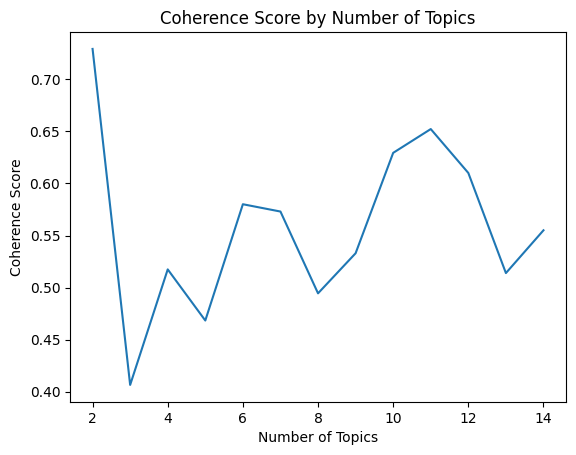

In [47]:
import pandas as pd
import gensim
import gensim.corpora as corpora
import nltk
from nltk.corpus import stopwords
from gensim.models import CoherenceModel
from nltk import ngrams
import random
import matplotlib.pyplot as plt

# Ensure NLTK resources are available
nltk.download('stopwords')

# Set random seed for reproducibility
random.seed(42)

# Define function to preprocess and tokenize text
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in gensim.utils.simple_preprocess(str(text)) if word not in stop_words]
    trigrams = list(ngrams(tokens, 3))
    trigram_tokens = ['_'.join(trigram) for trigram in trigrams]  # Join trigrams into single tokens
    return trigram_tokens if trigram_tokens else tokens

# Function to perform LDA and calculate coherence
def compute_coherence_values(df, start=2, limit=10, step=1):
    # Tokenize and create trigrams, ensuring all text is processed as strings
    processed_texts = df['cleaned_comment_original'].dropna().map(preprocess_text)

    # Create Dictionary and Corpus
    id2word = corpora.Dictionary(processed_texts)
    corpus = [id2word.doc2bow(text) for text in processed_texts]

    coherence_values = []
    model_list = []
    
    for num_topics in range(start, limit, step):
        # Build LDA model
        lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=num_topics,
                                               random_state=42,
                                               passes=10,
                                               workers=2)
        model_list.append(lda_model)
        # Compute Coherence Score
        coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_texts, dictionary=id2word, coherence='c_v')
        coherence_score = coherence_model_lda.get_coherence()
        coherence_values.append(coherence_score)
        print(f'Number of Topics: {num_topics}, Coherence Score: {coherence_score}')
    
    return model_list, coherence_values

# Plot coherence values to find the optimal number of topics
def plot_coherence(coherence_values, start=2, limit=10, step=1):
    x = range(start, limit, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence Score")
    plt.title("Coherence Score by Number of Topics")
    plt.show()

# Load the Fiat dataset as a DataFrame
fiat_comments_df = pd.read_csv('/Users/abhishekroy/Downloads/mini_cooper_2019_comments.csv')

# Compute coherence values for a range of topics
model_list, coherence_values = compute_coherence_values(fiat_comments_df, start=2, limit=15, step=1)

# Plot the coherence scores to visualize the optimal number of topics
plot_coherence(coherence_values, start=2, limit=15, step=1)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abhishekroy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Topic 0: 0.001*"allow_panel_move" + 0.001*"remember_italian_coachbuilder" + 0.001*"get_subframe_make" + 0.001*"somewhere_close_sure" + 0.001*"panel_edge_panel" + 0.001*"inner_wing_panel" + 0.001*"close_sure_remember" + 0.001*"subframe_make_sure" + 0.001*"front_panel_somewhere" + 0.001*"forward_create_door"


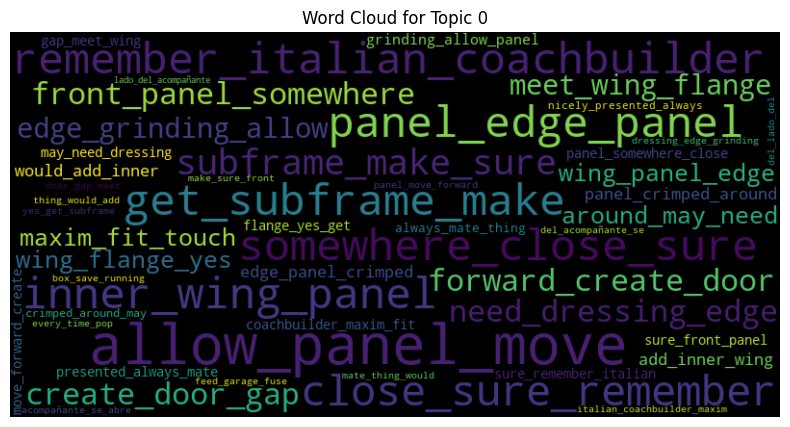

Topic 1: 0.001*"agree" + 0.001*"great_video_dave" + 0.001*"using_wheel_arch" + 0.001*"pasa_lo_mismo" + 0.001*"lt_click_gt" + 0.001*"part_panel_get" + 0.001*"video_one_show" + 0.001*"would_great_point" + 0.001*"hmp_need_replace" + 0.001*"splicing_piece_repairing"


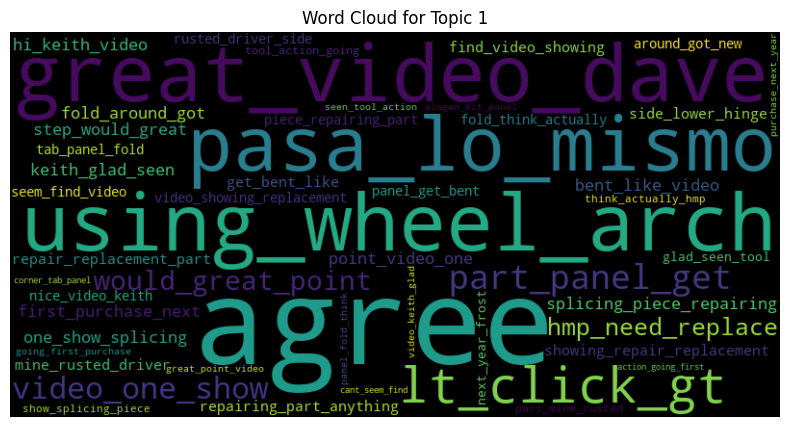

In [12]:
import pandas as pd
import gensim
import gensim.corpora as corpora
import nltk
from nltk.corpus import stopwords
from nltk import ngrams
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Ensure NLTK resources are available
nltk.download('stopwords')

# Set random seed for reproducibility
random.seed(42)

# Define function to preprocess and tokenize text
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in gensim.utils.simple_preprocess(str(text)) if word not in stop_words]
    trigrams = list(ngrams(tokens, 3))
    trigram_tokens = ['_'.join(trigram) for trigram in trigrams]  # Join trigrams into single tokens
    return trigram_tokens if trigram_tokens else tokens

# Function to perform LDA and visualize topics with PyLDAvis
def perform_topic_modeling(df, num_topics=2):
    # Tokenize and create trigrams
    processed_texts = df['cleaned_comment_original'].dropna().map(preprocess_text)

    # Create Dictionary and Corpus
    id2word = corpora.Dictionary(processed_texts)
    corpus = [id2word.doc2bow(text) for text in processed_texts]

    # Build LDA model with the selected number of topics
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics,
                                           random_state=42,
                                           passes=10,
                                           workers=2)

    # Display the topics and generate word clouds
    topics = lda_model.print_topics()
    for idx, topic in topics:
        print(f'Topic {idx}: {topic}')
        wordcloud = WordCloud(width=800, height=400, random_state=42).generate_from_frequencies(dict(lda_model.show_topic(idx, 50)))
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f'Word Cloud for Topic {idx}')
        plt.show()

    # Prepare the PyLDAvis visualization
    vis_data = gensimvis.prepare(lda_model, corpus, id2word)

    # Save the visualization as an HTML file
    pyLDAvis.save_html(vis_data, 'mini_2019_lda_vis.html')

    # Display the visualization in the notebook (optional)
    pyLDAvis.display(vis_data)
    display(pyLDAvis.display(vis_data))

# Load the Mini Cooper dataset as a DataFrame
mini_comments_df = pd.read_csv('/Users/abhishekroy/Downloads/mini_cooper_2019_comments.csv')

# Perform topic modeling on Mini Cooper 2019 comments using 2 topics
perform_topic_modeling(mini_comments_df, num_topics=2)


### Analysis of Mini Cooper 2019 Topics

The LDA topic modeling analysis for Mini Cooper's 2019 video comments revealed two distinct topics that contributed to the higher engagement during that period. Below is an overview of the identified topics and why they might have driven engagement:

#### **Topic 1: Technical Discussions and Restoration Projects**
- **Key Terms:** panel, wing, subframe, coachbuilder, flange, replacement
- **Description:** This topic revolves around detailed discussions on technical aspects of Mini Cooper restoration and repair. Enthusiasts and DIYers frequently discuss parts like panels, subframes, and specific restoration techniques. The focus on precise restoration practices, such as crimping panels and creating door gaps, reflects a community deeply engaged in the technical side of maintaining and restoring classic Mini Coopers.
- **Impact on Engagement:** The high level of engagement can be attributed to the niche but passionate audience interested in hands-on restoration projects. The exchange of knowledge and tips among enthusiasts creates a vibrant community, which likely leads to increased comments and interactions.

#### **Topic 2: Viewer Feedback and Recommendations**
- **Key Terms:** video, great, tool, repair, showing, purchase, glad, keith
- **Description:** This topic captures feedback from viewers on the content of the videos, particularly praising the quality of the tutorials and the usefulness of the tools showcased. Viewers often express appreciation for the videos, recommend tools, and discuss potential purchases influenced by the content.
- **Impact on Engagement:** The direct interaction between content creators and viewers, where viewers provide feedback and recommendations, fosters a sense of community and loyalty. This interactive feedback loop likely encouraged more viewers to engage, comment, and share their own experiences, leading to higher overall engagement.

### Why Engagement Was Higher in 2019
The higher engagement in 2019 can be attributed to the combination of these two topics. The first topic appeals to a dedicated group of Mini Cooper enthusiasts who are highly invested in the technical aspects of vehicle restoration. The second topic reflects the effective content strategy of creators who engage their audience by addressing their feedback and showcasing practical tools. The overlap between a highly engaged niche audience and responsive content likely drove the increase in comments and interactions during this period.

This analysis highlights the importance of understanding your audience's interests and fostering an interactive community to drive engagement, particularly in niche markets like classic car restoration.


### Comparison of Topics: What Worked for Fiat vs. Mini Cooper

#### **Fiat 2020 Topics**
1. **Topic 1: City Driving and Compact Design**
   - **Key Terms:** city, small, easy, drive, parking
   - **Success Factor:** This topic centers around the Fiat 500's appeal as an ideal city car. The focus on ease of parking, compact size, and suitability for urban environments resonated well with city dwellers. The car's design and practicality in congested cityscapes were highlighted as major selling points, driving engagement from an audience that prioritizes convenience in urban settings.

2. **Topic 2: Style and Aesthetics**
   - **Key Terms:** design, beautiful, color, interior, retro
   - **Success Factor:** Fiat's emphasis on style, particularly the retro design and colorful aesthetics, struck a chord with users. The visual appeal of the Fiat 500, combined with its customizable options, attracted comments from users who value design and personalization in their vehicles. This focus on aesthetics and lifestyle branding helped Fiat tap into a market segment that appreciates cars as fashion statements.

#### **Mini Cooper 2019 Topics**
1. **Topic 1: Technical Discussions and Restoration Projects**
   - **Key Terms:** panel, wing, subframe, coachbuilder, flange, replacement
   - **Success Factor:** This topic highlights the deep technical knowledge and hands-on approach of Mini Cooper enthusiasts. The detailed discussions on restoration projects and specific car parts showcase a community highly engaged in maintaining and restoring classic Mini Coopers. The focus on DIY restoration and technical mastery appeals to a niche but passionate audience, driving substantial engagement from hobbyists and car restorers.

2. **Topic 2: Viewer Feedback and Recommendations**
   - **Key Terms:** video, great, tool, repair, showing, purchase, glad, keith
   - **Success Factor:** The interaction between content creators and viewers, where feedback on video content and tools is exchanged, plays a critical role in maintaining high engagement levels. The direct engagement with viewers' comments and recommendations fosters a loyal community that feels connected to the content creators, leading to ongoing discussions and higher interaction rates.

### Summary of What Worked
- **Fiat:** 
  - **Urban Appeal:** Fiat's success in 2020 was largely driven by its focus on urban practicality and stylish design. By highlighting the Fiat 500's suitability for city driving and its aesthetic appeal, Fiat managed to engage an audience that values convenience and style.
  
- **Mini Cooper:** 
  - **Technical Expertise and Community Engagement:** Mini Cooper's engagement in 2019 was fueled by the strong technical content related to car restoration and the active participation of a dedicated community. The detailed restoration discussions and the responsive interaction with the audience were key drivers of engagement.

### Conclusion
Fiat's engagement was driven by its appeal to urban drivers and those who value style, whereas Mini Cooper's engagement was rooted in the technical expertise and active community involvement of its enthusiasts. Each brand succeeded by tapping into different aspects of car ownership that resonated deeply with their respective audiences.
